# Necessary Imports

In [437]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [438]:
from multimode_expts.analysis_notebooks.expts_run_base import *

In [439]:
expts_base_inst = expts_run_base(data_path=r'H:\Shared drives\SLab\Multimode\experiment\250505_craqm', 
                            config_name='hardware_config_202505.yml',
                              exp_param_name='experiment_config.yml', qubit_i=0)

path:  H:\Shared drives\SLab\Multimode\experiment\250505_craqm
Data will be stored in H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data
Hardware configs will be read from C:\_Lib\python\multimode_expts\configs\hardware_config_202505.yml
Experiment params will be read from C:\_Lib\python\multimode_expts\configs\experiment_config.yml
<Pyro4.core.Proxy at 0x1c264a0d850; not connected; for PYRO:obj_60f1dbe4d66e49e4a42ce8f10a5bd4b8@192.168.137.101:35093>
Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\mul

# Characterization

## Parity Delay

In [13]:
def do_parity_delay(
    config_thisrun,
    expt_path,
    config_path,
    start=0.01,
    step=0.05,
    expts=100,
    reps=200,
    rounds=1,
    qubits=[0],
    prepulse=True,
    normalize=False,
    active_reset=False,
    man_reset=True,
    storage_reset=True,
    pre_gate_sweep_pulse=[],
    man_mode_no=1,
    relax_delay=2500
):
    """Run the Parity Delay experiment with configurable parameters."""
    from MM_dual_rail_base import MM_dual_rail_base
    mm_base_dummy = MM_dual_rail_base(config_thisrun)
    prep_man_pi = mm_base_dummy.prep_man_photon(man_mode_no)
    expt_cfg = {
        'start': start,
        'step': step,
        'expts': expts,
        'reps': reps,
        'rounds': rounds,
        'qubits': qubits,
        'prepulse': prepulse,
        'normalize': normalize,
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'pre_sweep_pulse': [],
        'pre_gate_sweep_pulse': prep_man_pi
    }
    # print("expt_path:", expt_path)
    # print("config_path:", config_path)
    
    
    parity_delay_exp = expts_base_inst.meas.single_qubit.parity_delay.ParityDelayExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='ParityDelayExperiment', config_file=config_path
    )
    parity_delay_exp.cfg = AttrDict(deepcopy(config_thisrun))
    parity_delay_exp.cfg.expt = expt_cfg
    parity_delay_exp.cfg.device.readout.relax_delay = [relax_delay] 
    parity_delay_exp.go(analyze=False, display=False, progress=True, save=True)
    return parity_delay_exp


In [ ]:
parity_delay_exp = do_parity_delay(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file)

  0%|          | 0/100 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00002_ParityDelayExperiment.h5


Attempted to init fitparam 2 to -500, which is out of bounds -360 to 360. Instead init to 0.0
p1: 0.29146551235622287
p2: -77.59835390362066
Pi length: 1.5972763957631686
Pi/2 length: 0.739541983279899
p1: 0.28959159021035424
p2: 108.85068447526264
Pi length: 1.545752717624014
Pi/2 length: 0.6824679799063048


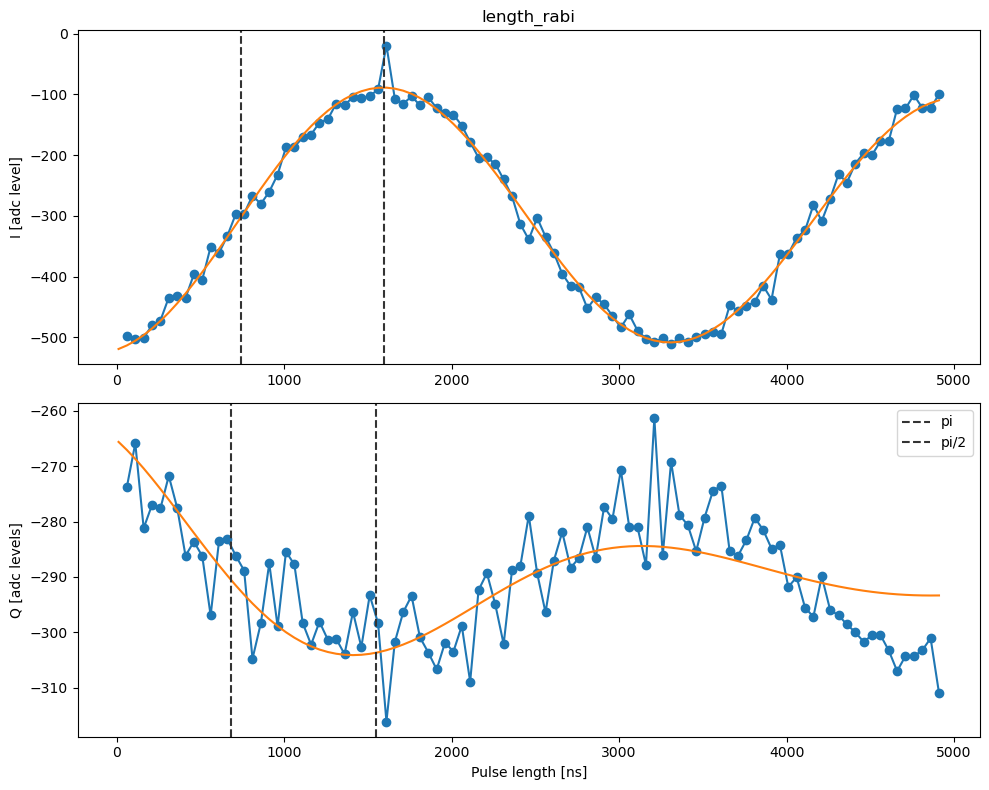

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-06-12_14-51-03_Length_Rabi_General_F0g1.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-06-12.md


In [ ]:
from multimode_expts.fit_display_classes import LengthRabiFitting
# Analyze the data
length_rabi_analysis = LengthRabiFitting(parity_delay_exp.data, config = parity_delay_exp.cfg)
length_rabi_analysis.analyze(fitparams = [500, 0.05, -500, None, None, None])
length_rabi_analysis.display(title_str='Length Rabi General F0g1')

In [ ]:
## Assign to config 
expts_base_inst.config_thisrun.device.manipulate.revival_time[0] = length_rabi_analysis.results['pi_length']

## Manipulate Parity Spectroscopy

In [82]:
def do_parity_freq_experiment(
    start=4975,
    stop=4995,
    step=0.1,
    reps=300,
    rounds=1,
    qubit=[0],
    normalize=False,
    single_shot=False,
    singleshot_reps=10000,
    span=20,
    manipulate_no=1,
    displace=(True, 0.1, 1000),
    const_pulse=(False, 1),
    f0g1_cavity=0,
    prepulse=False,
    pre_sweep_pulse=None,
    relax_delay=2500
):
    """
    Run the Parity Frequency Experiment with configurable parameters.
    """
    
    expt_cfg = {
        'start': start,
        'stop': stop,
        'step': step,
        'reps': reps,
        'rounds': rounds,
        'qubits': qubit,
        'normalize': normalize,
        'single_shot': single_shot,
        'singleshot_reps': singleshot_reps,
        'span': span,
        'manipulate': manipulate_no,
        'displace': list(displace),
        'const_pulse': list(const_pulse),
        'f0g1_cavity': f0g1_cavity,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse
    }
    # Example usage of relax_delay in experiment config:
    parity_freq_exp = expts_base_inst.meas.single_qubit.parity_freq.ParityFreqExperiment(
        soccfg=expts_base_inst.soc, path=expts_base_inst.expt_path, prefix='ParityFreqExperiment', config_file=expts_base_inst.config_file
    )
    parity_freq_exp.cfg = AttrDict(deepcopy(expts_base_inst.config_thisrun))
    parity_freq_exp.cfg.expt = expt_cfg
    parity_freq_exp.cfg.device.readout.relax_delay = [relax_delay]
    parity_freq_exp.go(analyze=False, display=False, progress=True, save=True)
    return parity_freq_exp


In [83]:
parity_freq_exp = do_parity_freq_experiment()

  0%|          | 0/200 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00001_ParityFreqExperiment.h5


Found peak in amps at [MHz] 4984.749254043593, HWHM 1.83459918578826
Found peak in I at [MHz] 4984.6412134851635, HWHM 2.0069524876583857
Found peak in Q at [MHz] 4984.424501063685, HWHM 1.8599670448812358


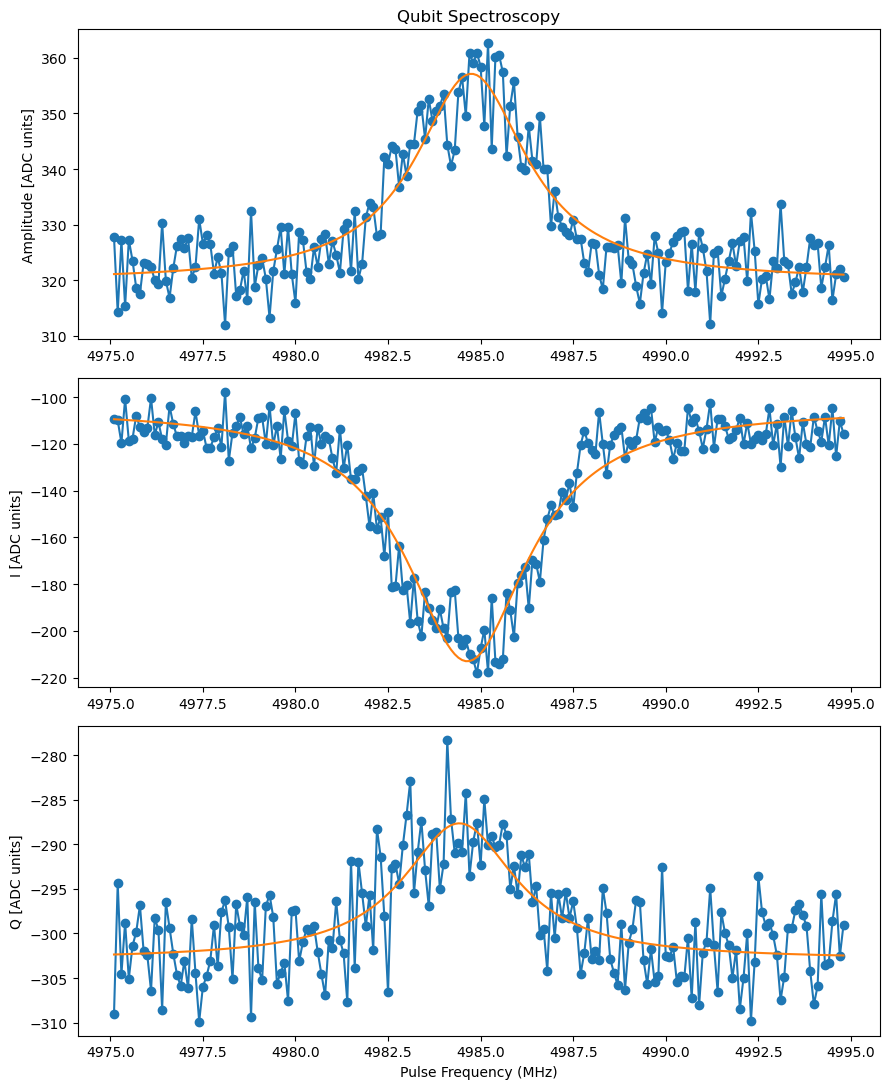

In [84]:
from fit_display_classes import Spectroscopy
spec = Spectroscopy(parity_freq_exp.data, config=parity_freq_exp.cfg)
spec.analyze()
spec.display()

In [87]:
expts_base_inst.config_thisrun.device.manipulate.f_ge[0] = spec.data['fit_avgi'][2]

## Manipulate SPectroscopy (Abandoned)

In [ ]:
##

In [ ]:
def do_cavity_spectroscopy(
    config_thisrun,
    expt_path,
    config_path,
    start=4980,
    step=0.01,
    expts=2000,
    reps=100,
    pulse_e=False,
    pulse_f=False,
    cavity_name='manipulate',
    drive_gain=500,
    qubit=0,
    RF_modulation=[False, 1055, 5000, 'high'],
    relax_delay=200
):
    """Run the Cavity Spectroscopy experiment with configurable parameters."""
    expt_cfg = {
        'start': start,
        'step': step,
        'expts': expts,
        'reps': reps,
        'pulse_e': pulse_e,
        'pulse_f': pulse_f,
        'cavity_name': cavity_name,
        'drive_gain': drive_gain,
        'qubit': qubit,
        'RF_modulation': RF_modulation
    }
    cavity_spec_exp = expts_base_inst.meas.single_qubit.cavity_spectroscopy.CavitySpectroscopyExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='CavitySpectroscopyExperiment', config_file=config_path
    )
    cavity_spec_exp.cfg = AttrDict(deepcopy(config_thisrun))
    cavity_spec_exp.cfg.expt = expt_cfg
    cavity_spec_exp.cfg.device.readout.relax_delay = [relax_delay]
    cavity_spec_exp.go(analyze=False, display=False, progress=True, save=True)
    return cavity_spec_exp


def update_res_spec(rspec, config_thisrun):
    config_thisrun.device.manipulate.f_ge[0] = [rspec.data['fit'][0]]
    print('Updated man_freq frequency!')

In [65]:
cav_spec = do_cavity_spectroscopy(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    start=4980,
    step=0.01,
    expts=2000,
    reps=100,
    drive_gain=500,
    pulse_e=False,
    pulse_f=False)

  0%|          | 0/2000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00003_CavitySpectroscopyExperiment.h5


Found peak in amps at [MHz] 4994.258231293479, HWHM 4.570021603556433
Found peak in I at [MHz] 4993.312118594898, HWHM 6.115466418630603
Found peak in Q at [MHz] 4993.317965879784, HWHM 1.704258037685837


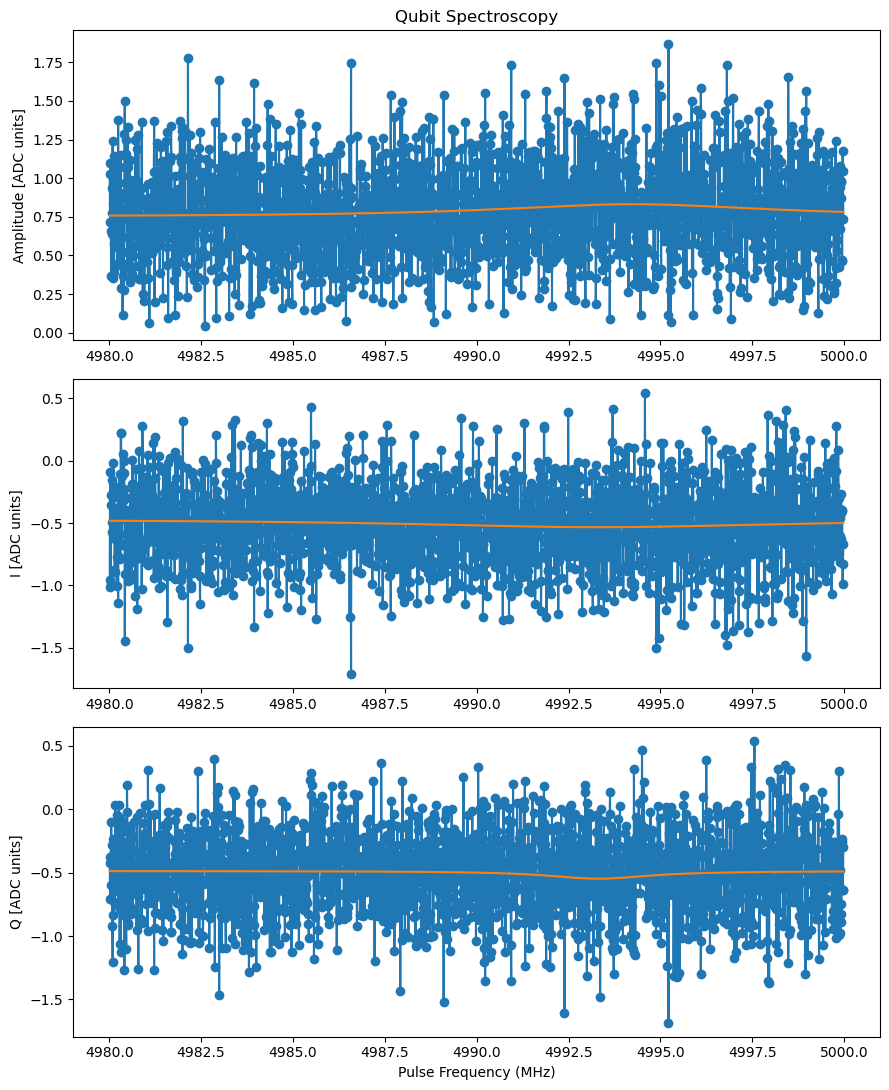

In [66]:
from fit_display_classes import Spectroscopy
spec = Spectroscopy(cav_spec.data, config=cav_spec.cfg)
spec.analyze()
spec.display()

## Gain to Alpha Calibration

Will do tomography on the vaccum state 

$W_{\alpha} (|0\rangle\langle0|) = \frac{2}{\pi} e^{-2|\alpha|^2}$

In [361]:
def do_parity_gain_experiment(
    config_thisrun,
    expt_path,
    config_path,
    start=0,
    step=115,
    expts=100,
    reps=500,
    rounds=1,
    qubit=0,
    qubits=[0],
    normalize=False,
    single_shot=True,
    singleshot_reps=10000,
    singleshot_active_reset=False,
    singleshot_man_reset=True,
    singleshot_storage_reset=True,
    active_reset=False,
    man_reset=True,
    storage_reset=True,
    span=1000,
    prep_e=False,
    manipulate=1,
    displace=(True, 0.05),
    const_pulse=(False, 1),
    f0g1_cavity=0,
    prepulse=False,
    pre_sweep_pulse=None,
    relax_delay=2500
):
    """
    Run the Parity Gain Experiment with configurable parameters.
    """
    expt_cfg = {
        'start': start,
        'step': step,
        'expts': expts,
        'reps': reps,
        'rounds': rounds,
        'qubit': qubit,
        'qubits': qubits,
        'normalize': normalize,
        'single_shot': single_shot,
        'singleshot_reps': singleshot_reps,
        'singleshot_active_reset': singleshot_active_reset,
        'singleshot_man_reset': singleshot_man_reset,
        'singleshot_storage_reset': singleshot_storage_reset,
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'span': span,
        'prep_e': prep_e,
        'manipulate': manipulate,
        'displace': list(displace),
        'const_pulse': list(const_pulse),
        'f0g1_cavity': f0g1_cavity,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse if pre_sweep_pulse is not None else []
    }
    parity_gain_exp = expts_base_inst.meas.single_qubit.parity_gain.ParityGainExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='ParityGainExperiment', config_file=config_path
    )
    parity_gain_exp.cfg = AttrDict(deepcopy(config_thisrun))
    parity_gain_exp.cfg.expt = expt_cfg
    parity_gain_exp.cfg.device.readout.relax_delay = [relax_delay]
    parity_gain_exp.go(analyze=False, display=False, progress=True, save=True)
    return parity_gain_exp

In [197]:
prep_man_pi

[['qubit', 'ge', 'pi', 0],
 ['qubit', 'ef', 'pi', 0],
 ['man', 'M1', 'pi', 0],
 ['qubit', 'ge', 'pi', 0],
 ['qubit', 'ef', 'pi', 0],
 ['man', 'M1', 'pi', 0]]

In [362]:
parity_gain_expt = do_parity_gain_experiment(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file
)

sscfg active reset False


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

[4]
1


  0%|          | 0/50000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00006_ParityGainExperiment.h5


Rotating data by -0.6975877896927776 radians
(500, 100)


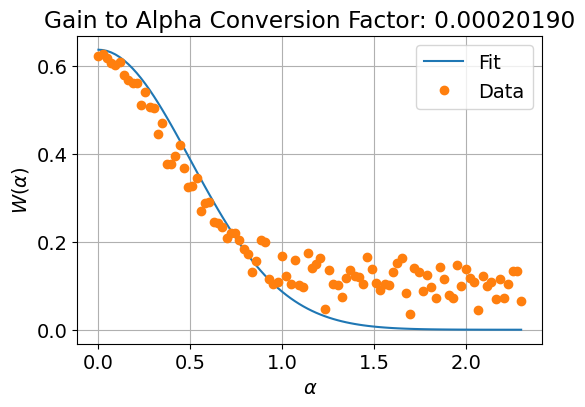

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-06-18_16-43-26_Gain_to_Alpha_Conversion_Factor_0.00020190.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-06-18.md
alpha = 1 requires gain of : 4952.86850406


In [426]:
from fitting_folder.wigner import WignerAnalysis
wigner_analysis = WignerAnalysis(parity_gain_expt.data, config=parity_gain_expt.cfg)
gain_to_alpha, result, ydata = wigner_analysis.get_gain_to_alpha()

In [370]:
expts_base_inst.config_thisrun.device.manipulate.gain_to_alpha[0]

0.00014281

In [372]:
expts_base_inst.config_thisrun.device.manipulate.gain_to_alpha[0] = gain_to_alpha

TypeError: save_configurations() missing 4 required positional arguments: 'yaml_cfg', 'config_thisrun', 'autocalib_path', and 'config_path'

## Photon Number Resolved  Spectroscopy

In [249]:
def do_pulse_probe(
    config_thisrun, 
    start=3560,  # [MHz]
    step=0.1,  # min step ~1 MHz
    expts=200,  # Number of experiments stepping from start
    reps=2000,  # Number of averages per point
    rounds=1,  # Number of start to finish sweeps to average over
    length=1,  # Qubit probe constant pulse length [us]
    gain=400,  # Qubit pulse gain
    sigma=0.1,  # Qubit flat top sigma
    qubit=0,
    prepulse=False,
    pre_sweep_pulse=[],
    gate_based=False,
    relax_delay=250,  # Wait time between experiments [us]
    ): 
    qspec = expts_base_inst.meas.single_qubit.pulse_probe_spectroscopy.PulseProbeSpectroscopyExperiment(
        soccfg=expts_base_inst.soc, path=expts_base_inst.expt_path, prefix='PulseProbeSpectroscopyExperiment', 
        config_file=expts_base_inst.config_file
    )

    qspec.cfg = AttrDict(deepcopy(config_thisrun))

    qspec.cfg.expt = dict(
        qubits = [0],
        start=start,
        step=step,
        expts=expts,
        reps=reps,
        rounds=rounds,
        length=length,
        gain=gain,
        sigma=sigma,
        qubit=qubit,
        prepulse = prepulse, 
        pre_sweep_pulse = pre_sweep_pulse,
        gate_based = gate_based,
    )

    qspec.cfg.device.readout.relax_delay = [relax_delay] # Wait time between experiments [us]
    qspec.go(analyze=True, display=True, progress=True, save=True)
    return qspec

qubit register page: 1, frequency register: 21


  0%|          | 0/10000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00089_PulseProbeSpectroscopyExperiment.h5
Found peak in amps at [MHz] 3567.3459773374816, HWHM -0.05979923740774963
Found peak in I at [MHz] 3567.3439966605147, HWHM -0.05454388093036626
Found peak in Q at [MHz] 3566.843780950836, HWHM 106.85806328384594


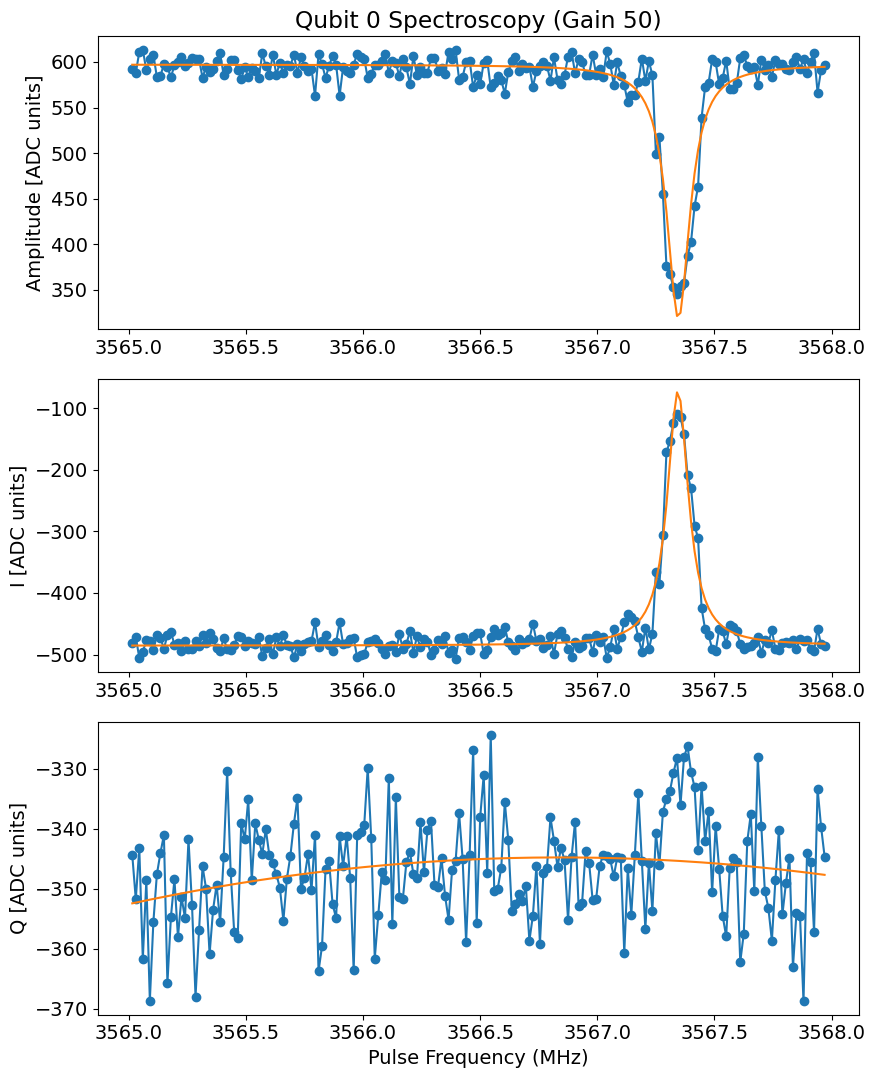

In [258]:
qspec = do_pulse_probe(
    config_thisrun=expts_base_inst.config_thisrun,
    start=3565,  # [MHz]
    step=0.015,  # min step ~1 MHz
    expts=200,  # Number of experiments stepping from start
    reps=50,  # Number of averages per point
    rounds=1,  # Number of start to finish sweeps to average over
    length=6.3,  # Qubit probe constant pulse length [us]
    gain=50,  # Qubit pulse gain
    sigma=0.1,  # Qubit flat top sigma
    qubit=0,
    prepulse=False,
    pre_sweep_pulse=[],
    gate_based=False,
    relax_delay=2500  # Wait time between experiments [us]
)

In [257]:
print(qspec.prog)


// Program

        regwi 3, $11, 467365305;                //freq = 467365305
        regwi 3, $12, 405728358;                //phase = 405728358
        regwi 3, $14, 800;                      //gain = 800
        regwi 3, $15, 590469;                   //phrst| stdysel | mode | | outsel = 0b01001 | length = 645 
        synci 86;
        regwi 2, $4, 599066256;                 //
        bitwi 2, $4, $4 << 2;
        mathi 2, $4, $4 + 2;
        synci 200;
        regwi 0, $13, 0;
        regwi 0, $14, 199;
LOOP_I: regwi 0, $15, 49;
LOOP_J: regwi 1, $21, 599066256;                //freq = 2396265026
        bitwi 1, $21, $21 << 2;
        mathi 1, $21, $21 + 2;
        regwi 1, $22, 0;                        //phase = 0
        regwi 1, $24, 50;                       //gain = 50
        regwi 1, $23, 224;                      //addr = 224
        regwi 1, $27, 304;                      //addr2 = 304
        regwi 1, $28, 25;                       //gain2 = 25
        regwi 1, $29, 

#### Man |1>

In [278]:
from MM_dual_rail_base import MM_dual_rail_base
mm_base_dummy = MM_dual_rail_base(expts_base_inst.config_thisrun )
prep_man_pi = mm_base_dummy.prep_man_photon(man_no=1)

In [279]:
prep_man_pi

[['qubit', 'ge', 'pi', 0], ['qubit', 'ef', 'pi', 0], ['man', 'M1', 'pi', 0]]

qubit register page: 1, frequency register: 21


  0%|          | 0/10000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00093_PulseProbeSpectroscopyExperiment.h5
Found peak in amps at [MHz] 3567.048794828799, HWHM -0.05424176313303839
Found peak in I at [MHz] 3567.0498807402982, HWHM -0.04881838182745145
Found peak in Q at [MHz] 3567.969850496194, HWHM 0.0001763464122398145


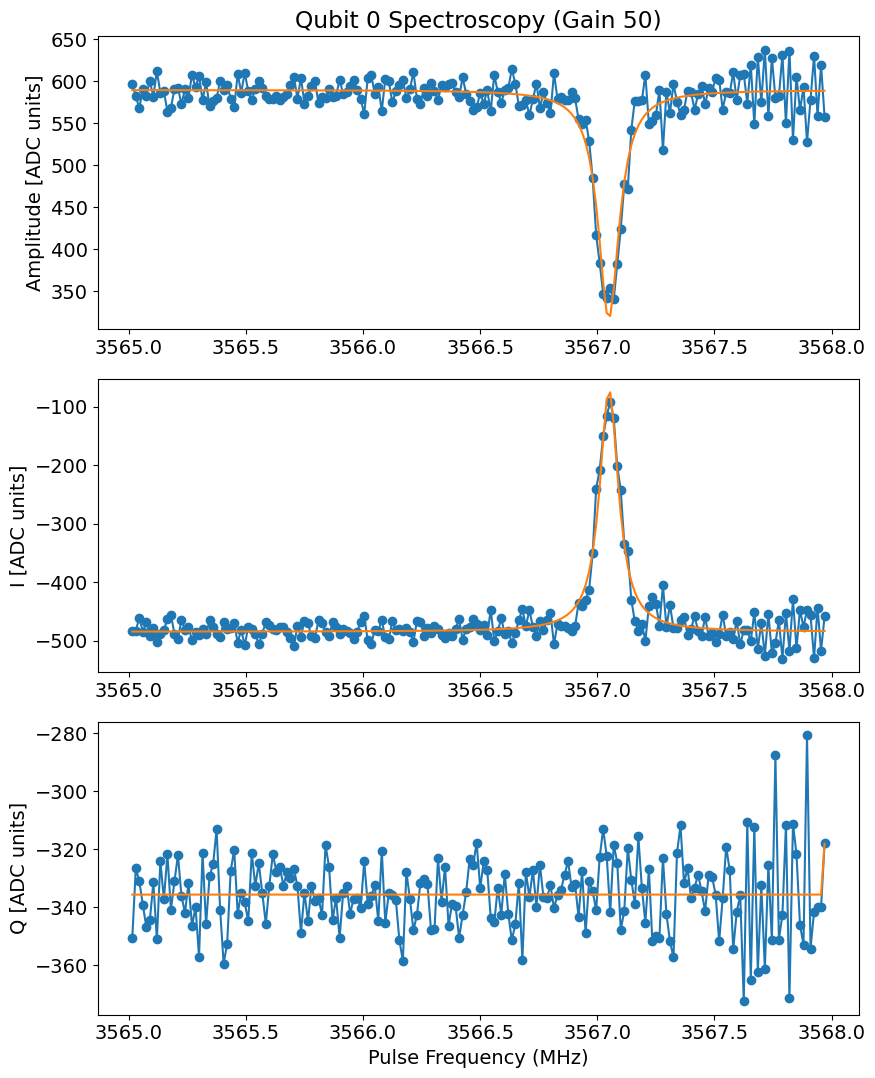

In [280]:
qspec1= do_pulse_probe(
    config_thisrun=expts_base_inst.config_thisrun,
    start=3565,  # [MHz]
    step=0.015,  # min step ~1 MHz
    expts=200,  # Number of experiments stepping from start
    reps=50,  # Number of averages per point
    rounds=1,  # Number of start to finish sweeps to average over
    length=6.3,  # Qubit probe constant pulse length [us]
    gain=50,  # Qubit pulse gain
    sigma=0.1,  # Qubit flat top sigma
    qubit=0,
    prepulse=True,
    pre_sweep_pulse=prep_man_pi,
    gate_based=True,
    relax_delay=2500  # Wait time between experiments [us]
)

#### Man |2>

In [ ]:
##
##

In [336]:
from MM_dual_rail_base import MM_dual_rail_base
mm_base_dummy = MM_dual_rail_base(expts_base_inst.config_thisrun )
prep_man_pi = mm_base_dummy.prep_man_photon(man_no=1)
# Add another ge pulse and change its parameters 
prep_man_pi.append(['multiphoton', 'g1-e1', 'pi', 0])
prep_man_pi.append(['multiphoton', 'e1-f1', 'pi', 0])  
# prep_man_pi = [['qubit', 'ge', 'pi', 0], 
#                ['qubit', 'ef', 'pi', 0], 
#                ]  # This is the prepulse for the manipulate mode
prep_man_pi.append(['multiphoton', 'f1-g2', 'pi', 0])  
# prep_man_pi.append(['qubit', 'ef', 'pi', 0])
# prep_man_pi.append(['man', 'M1', 'pi', 0])  # This is the prepulse for the manipulate mode
## convert it to low level pulse 
yoyoyoyo =  [['multiphoton', 'g0-e0', 'hpi', 0],
                    ['qubit'
                    '', 'ge', 'parity_M' + str(1), 0],
                    ['multiphoton', 'g0-e0', 'hpi', 180]]
pulse = mm_base_dummy.get_prepulse_creator(yoyoyoyo).pulse.tolist()
pulse

[[3567.348089, 3567.346827832447, 3567.348089],
 [9906, 0, 9906],
 [0, 1.5972763957631686, 0],
 [0, 0, 180],
 [2, 2, 2],
 ['gauss', 'const', 'gauss'],
 [0.02, 0.0, 0.02]]

In [328]:
mm_base.get_parity_str(1, True, 180, True)

[[3567.348089, 3567.346827832447, 3567.348089],
 [9906, 0, 9906],
 [0, 1.5972763957631686, 0],
 [0, 0, 180],
 [2, 2, 2],
 ['gauss', 'const', 'gauss'],
 [0.02, 0.0, 0.02]]

In [452]:
qspec2= do_pulse_probe(
    config_thisrun=expts_base_inst.config_thisrun,
    start=3565,  # [MHz]
    step=0.015,  # min step ~1 MHz
    expts=200,  # Number of experiments stepping from start
    reps=50,  # Number of averages per point
    rounds=1,  # Number of start to finish sweeps to average over
    length=6.3,  # Qubit probe constant pulse length [us]
    gain=50,  # Qubit pulse gain
    sigma=0.1,  # Qubit flat top sigma
    qubit=0,
    prepulse=True,
    pre_sweep_pulse=pulse,
    gate_based=False,
    relax_delay=8000  # Wait time between experiments [us]
)

qubit register page: 1, frequency register: 21


  0%|          | 0/10000 [00:00<?, ?it/s]

KeyboardInterrupt: 

### Man |2> with 2 swaps with storage

In [453]:
# adding g1-e1 and e1-f1 to the prepulse 
from MM_dual_rail_base import MM_dual_rail_base
mm_base_dummy = MM_dual_rail_base(expts_base_inst.config_thisrun)
prep_man_pi = mm_base_dummy.prep_man_photon(man_no=1)
# Add another ge pulse and change its parameters 
prep_man_pi.append(['multiphoton', 'g1-e1', 'pi', 0])
prep_man_pi.append(['multiphoton', 'e1-f1', 'pi', 0])  

prep_man_pi.append(['multiphoton', 'f1-g2', 'pi', 0])   # This is the prepulse for the manipulate mode
prep_man_pi.append(['storage', 'M1-S1', 'pi', 0]) 
prep_man_pi.append(['storage', 'M1-S1', 'pi', 0]) 
## convert it to low level pulse 
pulse = mm_base_dummy.get_prepulse_creator(prep_man_pi).pulse.tolist()


# post_pulse = [[pulse[i][-1]] for i in range(len(pulse))]  # post pulse is the same as prepulse
# post_pulse
pulse

[[3567.346827832447,
  3423.9868279076563,
  2005.9,
  3567.055708,
  3423.724467,
  2005.32,
  348.9178150893526,
  348.9178150893526],
 [10409, 8221, 15000, 10167, 8276, 15000, 3000, 3000],
 [0.0,
  0.0,
  1.082052141523385,
  0,
  0,
  0.762198579,
  0.9561816662492874,
  0.9561816662492874],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [2, 2, 0, 2, 2, 0, 1, 1],
 ['g', 'g', 'flat_top', 'gauss', 'gauss', 'flat_top', 'flat_top', 'flat_top'],
 [0.035, 0.035, 0.005, 0.035, 0.035, 0.005, 0.005, 0.005]]

qubit register page: 1, frequency register: 21


  0%|          | 0/10000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00102_PulseProbeSpectroscopyExperiment.h5
Found peak in amps at [MHz] 3566.761982159376, HWHM -0.05281297283543981
Found peak in I at [MHz] 3566.7643750430457, HWHM -0.04939105290922845
Found peak in Q at [MHz] 3565.59290801568, HWHM -0.0007743223055383662


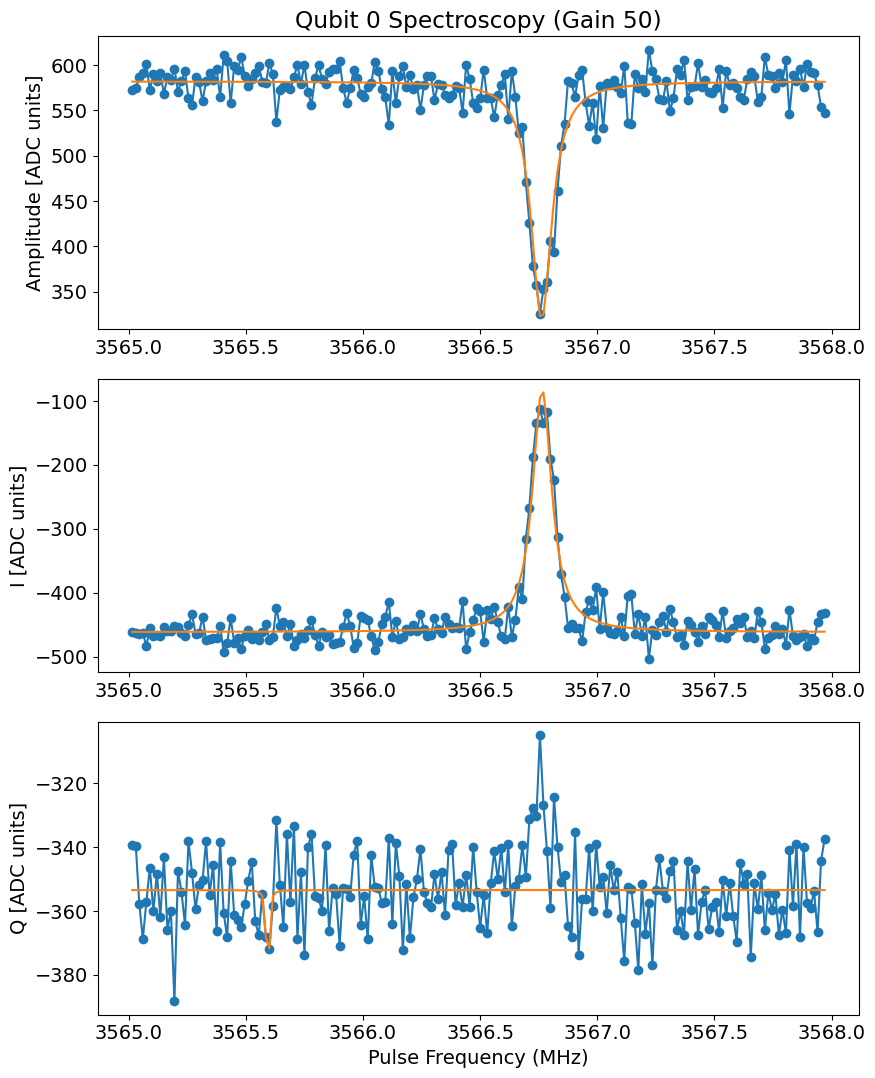

In [455]:
qspec2= do_pulse_probe(
    config_thisrun=expts_base_inst.config_thisrun,
    start=3565,  # [MHz]
    step=0.015,  # min step ~1 MHz
    expts=200,  # Number of experiments stepping from start
    reps=50,  # Number of averages per point
    rounds=1,  # Number of start to finish sweeps to average over
    length=6.3,  # Qubit probe constant pulse length [us]
    gain=50,  # Qubit pulse gain
    sigma=0.1,  # Qubit flat top sigma
    qubit=0,
    prepulse=True,
    pre_sweep_pulse=pulse,
    gate_based=False,
    relax_delay=8000  # Wait time between experiments [us]
)

In [456]:
pulse

[[3567.346827832447,
  3423.9868279076563,
  2005.9,
  3567.055708,
  3423.724467,
  2005.32,
  348.9178150893526,
  348.9178150893526],
 [10409, 8221, 15000, 10167, 8276, 15000, 3000, 3000],
 [0.0,
  0.0,
  1.082052141523385,
  0,
  0,
  0.762198579,
  0.9561816662492874,
  0.9561816662492874],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [2, 2, 0, 2, 2, 0, 1, 1],
 ['g', 'g', 'flat_top', 'gauss', 'gauss', 'flat_top', 'flat_top', 'flat_top'],
 [0.035, 0.035, 0.005, 0.035, 0.035, 0.005, 0.005, 0.005]]

### Man 0 + 2

In [427]:
from MM_dual_rail_base import MM_dual_rail_base
mm_base_dummy = MM_dual_rail_base(expts_base_inst.config_thisrun)
prep_02_pulse = []
prep_02_pulse.append(['qubit', 'ge', 'hpi', 0]) # g0 + e0 
prep_02_pulse.append(['qubit', 'ef', 'pi', 0]) # g0 + f0 
prep_02_pulse.append(['qubit', 'ge', 'pi', 0])# e0 + f0
prep_02_pulse.append(['multiphoton', 'f0-g1', 'pi', 0]) # e0 + g1 
prep_02_pulse.append(['multiphoton', 'g0-e0', 'pi', 0]) # g0 + e1
prep_02_pulse.append(['multiphoton', 'e1-f1', 'pi', 0]) # g0 + f1 
prep_02_pulse.append(['multiphoton', 'f1-g2', 'pi', 0]) # g0 + g2
prep_02_pulse
pulse = mm_base_dummy.get_prepulse_creator(prep_02_pulse).pulse.tolist()
pulse

[[3567.346827832447,
  3423.9868279076563,
  3567.346827832447,
  2005.9,
  3567.348089,
  3423.724467,
  2005.32],
 [4636, 8221, 10409, 15000, 19448, 8276, 15000],
 [0.0, 0.0, 0.0, 1.082052142, 0, 0, 0.762198579],
 [0, 0, 0, 0, 0, 0, 0],
 [2, 2, 2, 0, 2, 2, 0],
 ['g', 'g', 'g', 'flat_top', 'gauss', 'gauss', 'flat_top'],
 [0.035, 0.035, 0.035, 0.005, 0.02, 0.035, 0.005]]

qubit register page: 1, frequency register: 21


  0%|          | 0/10000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00100_PulseProbeSpectroscopyExperiment.h5
Found peak in amps at [MHz] 3567.3485231104773, HWHM -0.044449187332743216
Found peak in I at [MHz] 3567.3496649063213, HWHM -0.04184083952968795
Found peak in Q at [MHz] 3566.1376185659396, HWHM 115.20336330190237


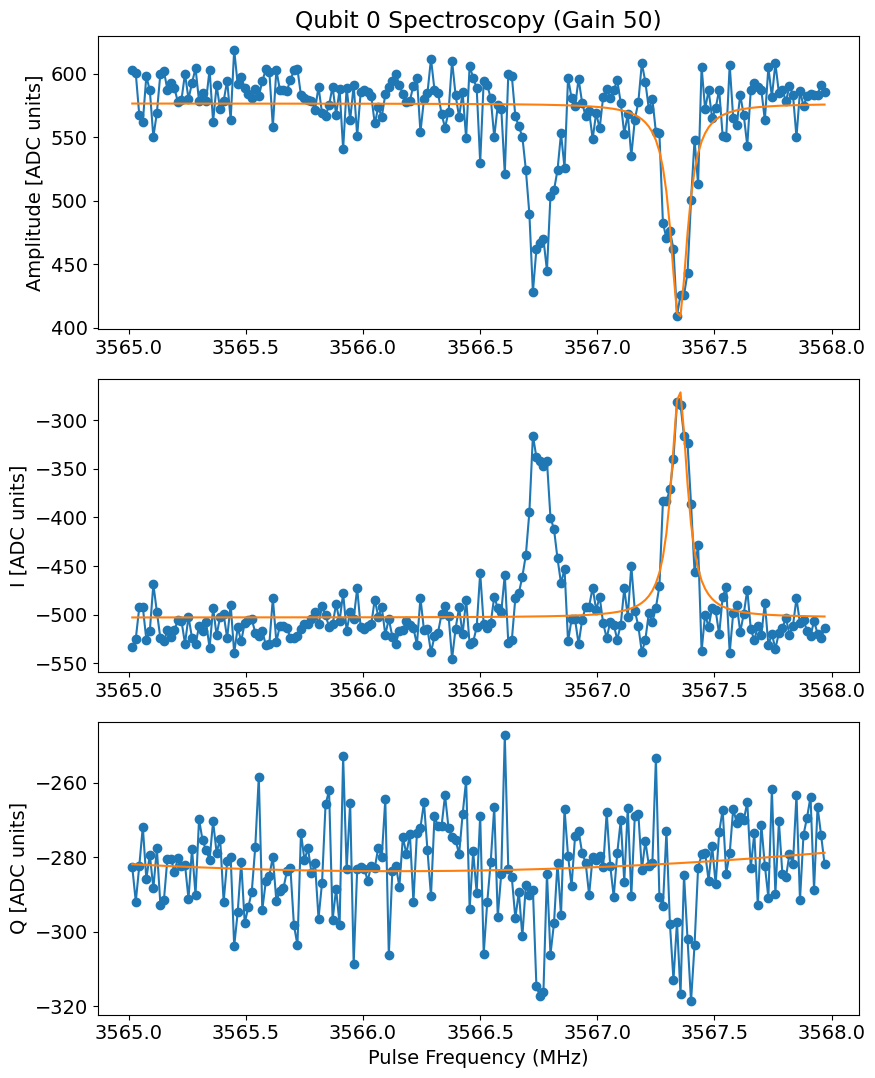

In [409]:
qspec2= do_pulse_probe(
    config_thisrun=expts_base_inst.config_thisrun,
    start=3565,  # [MHz]
    step=0.015,  # min step ~1 MHz
    expts=200,  # Number of experiments stepping from start
    reps=50,  # Number of averages per point
    rounds=1,  # Number of start to finish sweeps to average over
    length=6.3,  # Qubit probe constant pulse length [us]
    gain=50,  # Qubit pulse gain
    sigma=0.1,  # Qubit flat top sigma
    qubit=0,
    prepulse=True,
    pre_sweep_pulse=pulse,
    gate_based=False,
    relax_delay=2500  # Wait time between experiments [us]
)

# Wigner Tomography

## Generate Optimal Displacements 

In [162]:
expts_base_inst.path

'H:\\Shared drives\\SLab\\Multimode\\experiment\\250505_craqm'

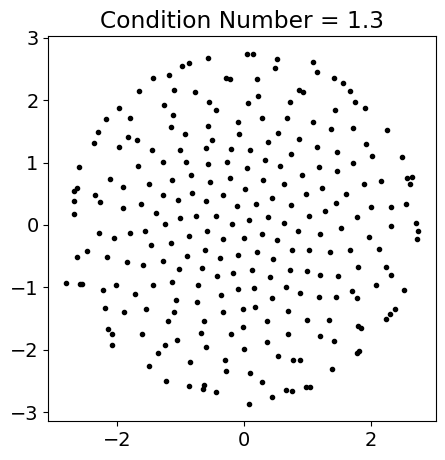

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
Displacements saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\optimized_displacements_4.npy


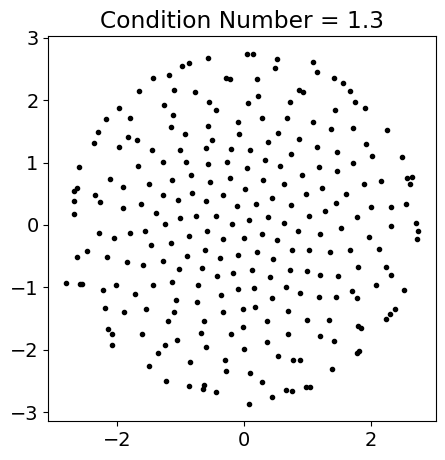

In [145]:
from fitting_folder.wigner import OptimalDisplacementGeneration
# Number of photons 
n_photon = 10
opt_alphas = OptimalDisplacementGeneration(FD = n_photon)
return_dict = opt_alphas.optimize(save_dir = expts_base_inst.expt_path )


## Wigner Tomography of |1>

In [267]:
def do_wigner_tomography_1mode(
    config_thisrun,
    expt_path,
    config_path,
    displace_length=0.05,
    displacement_path=None,
    prepulse=False,
    pre_sweep_pulse=None,
    pre_gate_sweep_pulse=None,
    reps = 1000,
    qubits=[0],
    relax_delay=2500
):
    """
    Run the Wigner Tomography 1 Mode Experiment with configurable parameters.
    """
    expt_cfg = {
        'displace_length': displace_length,
        'displacement_path': displacement_path,
        'reps': reps,
        'rounds': 1,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse if pre_sweep_pulse is not None else [],
        'pre_gate_sweep_pulse': pre_gate_sweep_pulse if pre_gate_sweep_pulse is not None else [],
        'qubits': qubits
    }
    wigner_exp = expts_base_inst.meas.qubit_cavity.single_mode_wigner_tomography.WignerTomography1ModeExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='WignerTomography1ModeExperiment', config_file=config_path
    )
    wigner_exp.cfg = AttrDict(deepcopy(config_thisrun))
    wigner_exp.cfg.expt = expt_cfg
    wigner_exp.cfg.device.readout.relax_delay = [relax_delay]
    wigner_exp.go(analyze=False, display=False, progress=True, save=True)
    return wigner_exp


In [266]:
from MM_dual_rail_base import MM_dual_rail_base
mm_base_dummy = MM_dual_rail_base(expts_base_inst.config_thisrun)
prep_man_pi = mm_base_dummy.prep_man_photon(1)


In [ ]:
wigner_exp = do_wigner_tomography_1mode(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    displace_length=0.05,
    displacement_path=return_dict['path'],
    prepulse=True,
    pre_sweep_pulse=None,
    pre_gate_sweep_pulse = prep_man_pi
)

man mode no: 1


  0%|          | 0/133 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00002_WignerTomography1ModeExperiment.h5


In [269]:

wigner_exp.data['idata'] = wigner_exp.data['i0'] # reorder  from (expt, round, rep) to (round, rep, expt)
wigner_exp.data['qdata'] = wigner_exp.data['q0'] # reorder  from (expt, round, rep) to (round, rep, expt)
# wigner_exp.cfg.expt['rounds'] = 1
# wigner_exp.cfg.expt['expts'] = len(wigner_exp.data['alpha'])

In [249]:
wigner_exp.data['idata'].shape

(133, 1, 1000)

In [171]:
temp_data, attrs, fname = expts_base_inst.prev_data('00002_WignerTomography1ModeExperiment.h5')

In [176]:
from fitting_folder.wigner import WignerAnalysis
from slab import AttrDict
wigner_analysis = WignerAnalysis(AttrDict(temp_data), config=AttrDict(attrs['config']), mode_state_num=5, alphas = temp_data['alpha'])
initial_state = fock(wigner_analysis.m, 1)  # Initial state |0>
allocated_counts = wigner_analysis.bin_ss_data()
p_e = allocated_counts # Probability of measuring the state |e
p_g = 1 - allocated_counts  # Probability of measuring the state |g

(1000, 133)


MLE Fidelity:  0.8955249001759994
supertitle is  Text(0.5, 0.98, 'MLE Fidelity: 0.8955')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-06-17_10-02-18_MLE.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-06-17.md


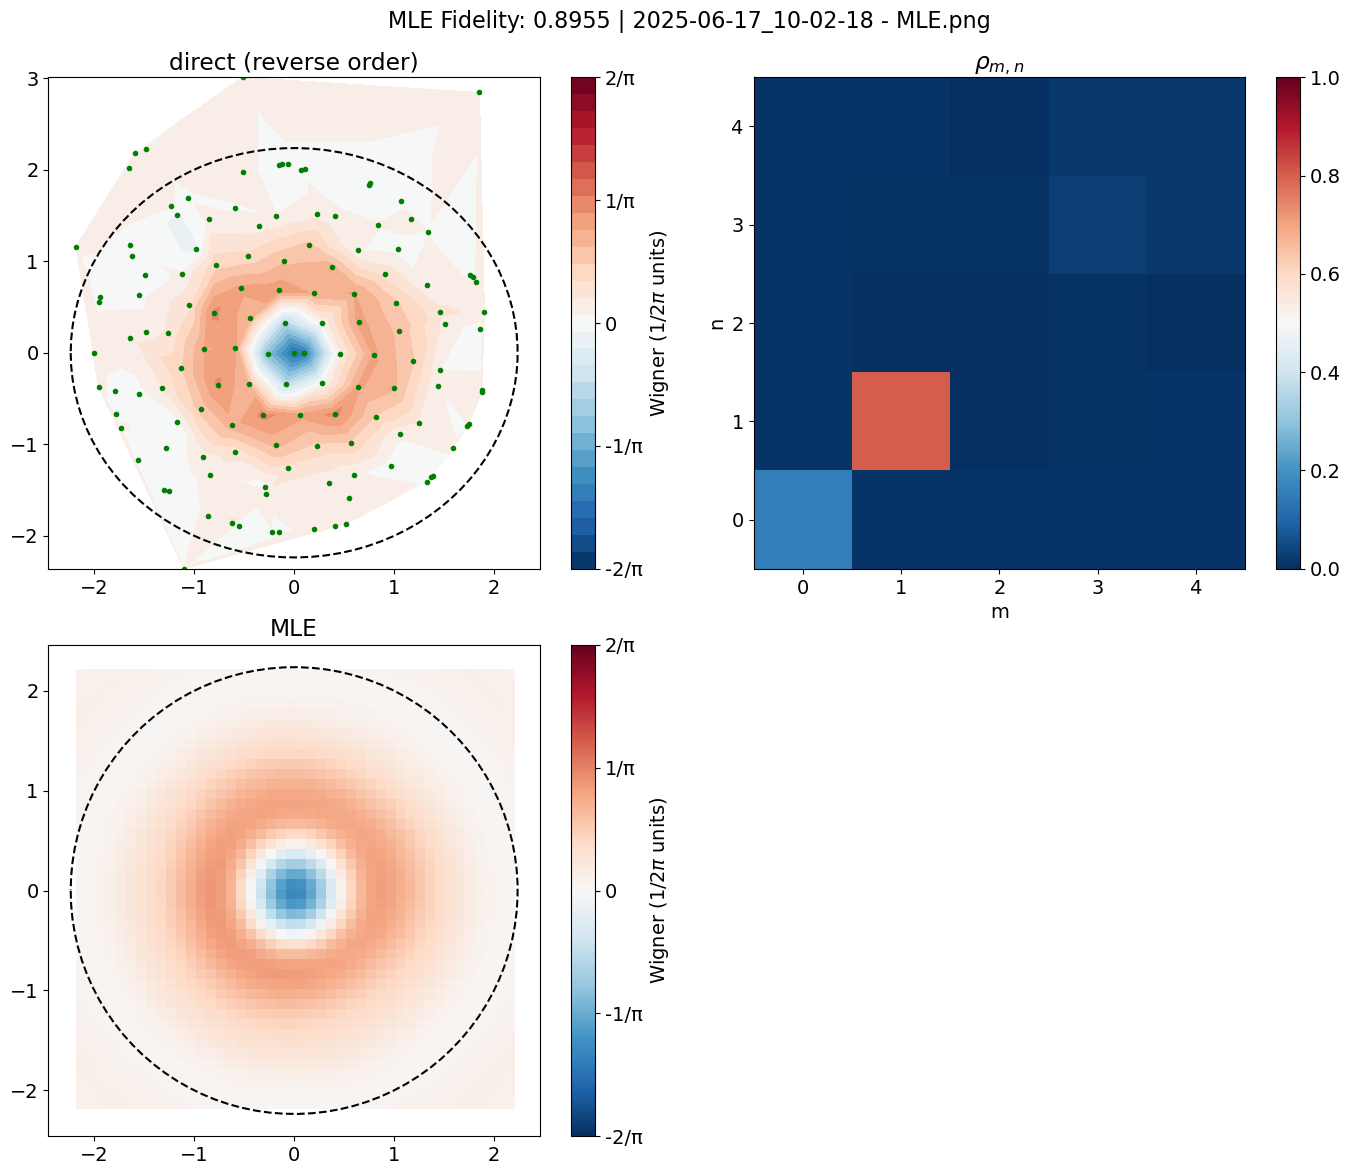

In [177]:
results = wigner_analysis.wigner_analysis_results((p_g, initial_state=initial_state)
fig = wigner_analysis.plot_wigner_reconstruction_results(results)

In [232]:
from qutip import *

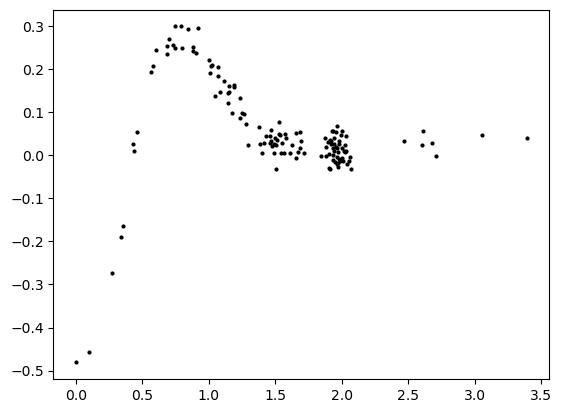

In [280]:
plt.plot(np.abs(wigner_analysis.data['alpha']), 2/np.pi *((1-allocated_counts) - allocated_counts), 'o', markersize=2, color='black')

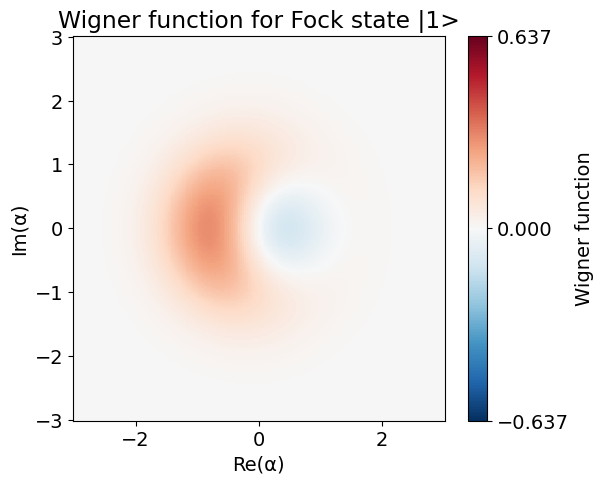

In [441]:
from qutip import wigner, fock, displace
import numpy as np
from matplotlib.ticker import MultipleLocator, FuncFormatter

import matplotlib.pyplot as plt




# Define parameters
N = 15  # Hilbert space dimension
n = 1 # Fock state |n>
xvec = np.linspace(-3, 3, 200)
yvec = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(xvec, yvec)
alpha = X + 1j * Y

# Create Fock state
psi = (fock(N, n) - fock(N, 0)).unit()

# Compute Wigner function
W = wigner(psi, xvec, yvec)

# Plot
fig, ax = plt.subplots(figsize=(6, 5))
c = ax.pcolormesh(X, Y, W, cmap='RdBu_r', shading='auto', vmin=-2/np.pi, vmax=2/np.pi)
ax.set_xlabel('Re(α)')
ax.set_ylabel('Im(α)')
ax.set_title(f'Wigner function for Fock state |{n}>')
cb = fig.colorbar(c, ax=ax)
cb.set_label('Wigner function')
cb.set_ticks([-2/np.pi, 0, 2/np.pi])
plt.show()

## Wigner Tomography of |2>

In [384]:
def do_wigner_tomography_1mode(
    config_thisrun,
    expt_path,
    config_path,
    displace_length=0.05,
    displacement_path=None,
    prepulse=False,
    pre_sweep_pulse=None,
    pre_gate_sweep_pulse=None,
    reps = 1000,
    qubits=[0],
    relax_delay=2500,
    gate_based = False
):
    """
    Run the Wigner Tomography 1 Mode Experiment with configurable parameters.
    """
    expt_cfg = {
        'displace_length': displace_length,
        'displacement_path': displacement_path,
        'reps': reps,
        'rounds': 1,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse if pre_sweep_pulse is not None else [],
        'pre_gate_sweep_pulse': pre_gate_sweep_pulse if pre_gate_sweep_pulse is not None else [],
        'qubits': qubits,
        'gate_based': gate_based
    }
    wigner_exp = expts_base_inst.meas.qubit_cavity.single_mode_wigner_tomography.WignerTomography1ModeExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='WignerTomography1ModeExperiment', config_file=config_path
    )
    wigner_exp.cfg = AttrDict(deepcopy(config_thisrun))
    wigner_exp.cfg.expt = expt_cfg
    wigner_exp.cfg.device.readout.relax_delay = [relax_delay]
    wigner_exp.go(analyze=False, display=False, progress=True, save=True)
    return wigner_exp


In [385]:
# adding g1-e1 and e1-f1 to the prepulse 
from MM_dual_rail_base import MM_dual_rail_base
mm_base_dummy = MM_dual_rail_base(expts_base_inst.config_thisrun)
prep_man_pi = mm_base_dummy.prep_man_photon(man_no=1)
# Add another ge pulse and change its parameters 
prep_man_pi.append(['multiphoton', 'g1-e1', 'pi', 0])
prep_man_pi.append(['multiphoton', 'e1-f1', 'pi', 0])  

prep_man_pi.append(['multiphoton', 'f1-g2', 'pi', 0])   # This is the prepulse for the manipulate mode
## convert it to low level pulse 
pulse = mm_base_dummy.get_prepulse_creator(prep_man_pi).pulse.tolist()


# post_pulse = [[pulse[i][-1]] for i in range(len(pulse))]  # post pulse is the same as prepulse
# post_pulse
pulse

[[3567.346827832447,
  3423.9868279076563,
  2005.9,
  3567.055708,
  3423.724467,
  2005.32],
 [10409, 8221, 15000, 10167, 8276, 15000],
 [0.0, 0.0, 1.082052141523385, 0, 0, 0.762198579],
 [0, 0, 0, 0, 0, 0],
 [2, 2, 0, 2, 2, 0],
 ['g', 'g', 'flat_top', 'gauss', 'gauss', 'flat_top'],
 [0.035, 0.035, 0.005, 0.035, 0.035, 0.005]]

In [386]:
wigner_exp = do_wigner_tomography_1mode(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    displace_length=0.05,
    displacement_path=return_dict['path'],
    prepulse=True,
    pre_sweep_pulse=pulse,
    gate_based = False
    # pre_gate_sweep_pulse = prep_man_pi
)

man mode no: 1


  0%|          | 0/261 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00007_WignerTomography1ModeExperiment.h5


In [387]:
from fitting_folder.wigner import WignerAnalysis
from qutip import fock  
wigner_analysis = WignerAnalysis(wigner_exp.data, config=wigner_exp.cfg, mode_state_num=10, alphas = wigner_exp.data['alpha'])
initial_state = fock(wigner_analysis.m, 2)  # Initial state |0>
allocated_counts = wigner_analysis.bin_ss_data()

(1000, 261)


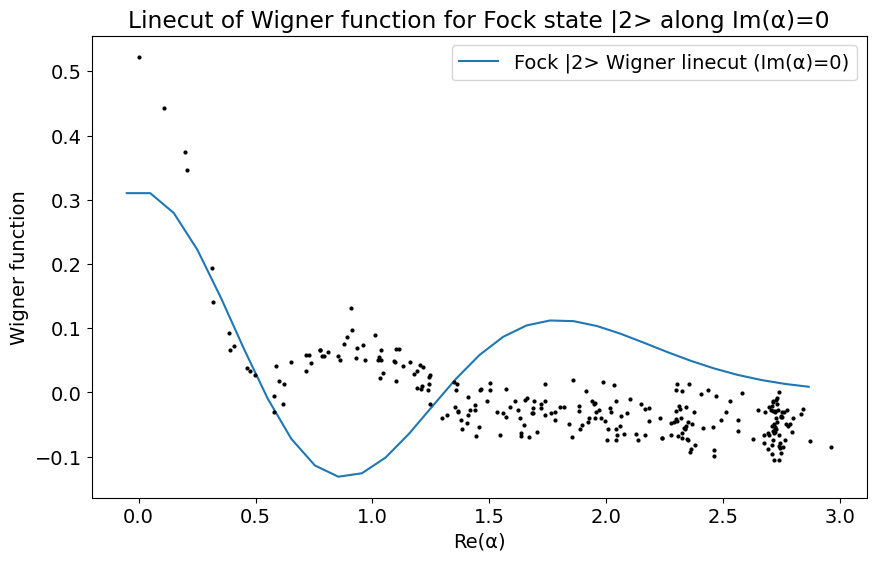

In [424]:
from qutip import wigner, fock




# Take a line cut of the Wigner function for Fock state |2> along the real axis (Im(α)=0)
N = 15  # Hilbert space dimension

# Take a line cut of the Wigner function for Fock state |2> along the real axis (Im(α)=0)

n = 2   # Fock state |2>
psi_fock2 = fock(N, n)
xvec = np.linspace(-10, 10, 200)
yvec = np.linspace(-10, 10, 200)
W_fock2 = wigner(psi_fock2, xvec, yvec)
# take linecut along the real axis (Im(α)=0) and plot 
# Find the index where Im(α)=0 (i.e., yvec closest to 0)
idx_y0 = (np.abs(yvec - 0)).argmin()
linecut = W_fock2[:, idx_y0]

idx_min = (np.abs(xvec - 0)).argmin()
idx_max = (np.abs(xvec - 3)).argmin()



plt.figure()
plt.plot(xvec[idx_min:idx_max], linecut[idx_min:idx_max], label='Fock |2> Wigner linecut (Im(α)=0)')
plt.plot(np.abs(wigner_exp.data['alpha']), 2/np.pi * (((1-allocated_counts) -allocated_counts)), 'o', markersize=2, color='black')
plt.xlabel('Re(α)')
plt.ylabel('Wigner function')
plt.title('Linecut of Wigner function for Fock state |2> along Im(α)=0')
plt.legend()
plt.show()

In [425]:
expts_base_inst.config_thisrun.device.manipulate.gain_to_alpha

[0.000201904580286975, 0.00020045]

MLE Fidelity:  0.5622278755896885
supertitle is  Text(0.5, 0.98, 'MLE Fidelity: 0.5622')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-06-18_15-49-33_MLE.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-06-18.md


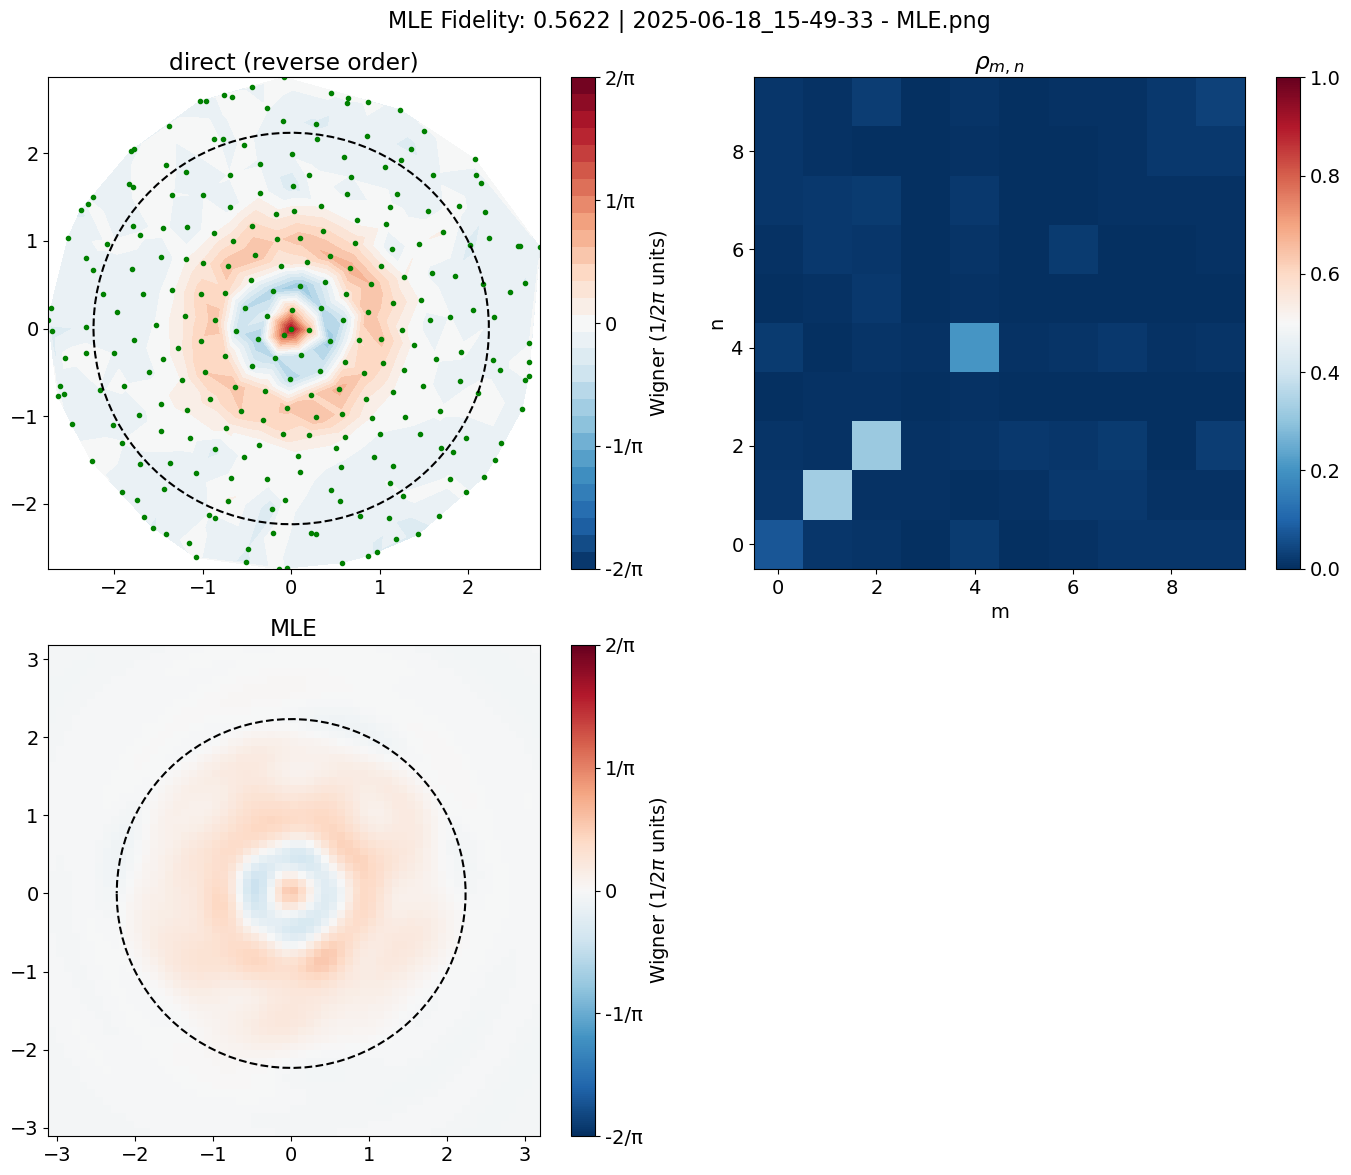

In [389]:
results = wigner_analysis.wigner_analysis_results(((1-allocated_counts) -allocated_counts), initial_state=initial_state)
fig = wigner_analysis.plot_wigner_reconstruction_results(results)

#### Wigner Tomography of |2> with swap

In [458]:
# adding g1-e1 and e1-f1 to the prepulse 
from MM_dual_rail_base import MM_dual_rail_base
mm_base_dummy = MM_dual_rail_base(expts_base_inst.config_thisrun)
prep_man_pi = mm_base_dummy.prep_man_photon(man_no=1)
# Add another ge pulse and change its parameters 
prep_man_pi.append(['multiphoton', 'g1-e1', 'pi', 0])
prep_man_pi.append(['multiphoton', 'e1-f1', 'pi', 0])  

prep_man_pi.append(['multiphoton', 'f1-g2', 'pi', 0])   # This is the prepulse for the manipulate mode
prep_man_pi.append(['storage', 'M1-S1', 'pi', 0]) 
prep_man_pi.append(['storage', 'M1-S1', 'pi', 0]) 
## convert it to low level pulse 
pulse = mm_base_dummy.get_prepulse_creator(prep_man_pi).pulse.tolist()


# post_pulse = [[pulse[i][-1]] for i in range(len(pulse))]  # post pulse is the same as prepulse
# post_pulse
pulse

[[3567.346827832447,
  3423.9868279076563,
  2005.9,
  3567.055708,
  3423.724467,
  2005.32,
  348.9178150893526,
  348.9178150893526],
 [10409, 8221, 15000, 10167, 8276, 15000, 3000, 3000],
 [0.0,
  0.0,
  1.082052141523385,
  0,
  0,
  0.762198579,
  0.9561816662492874,
  0.9561816662492874],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [2, 2, 0, 2, 2, 0, 1, 1],
 ['g', 'g', 'flat_top', 'gauss', 'gauss', 'flat_top', 'flat_top', 'flat_top'],
 [0.035, 0.035, 0.005, 0.035, 0.035, 0.005, 0.005, 0.005]]

In [ ]:
wigner_exp_2_swap = do_wigner_tomography_1mode(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    displace_length=0.05,
    reps = 200,
    displacement_path=return_dict['path'],
    prepulse=True,
    pre_sweep_pulse=pulse,
    gate_based = False,
    relax_delay=8000
)

## Wigner Tomography of |0+2>

In [ ]:
from MM_dual_rail_base import MM_dual_rail_base
mm_base_dummy = MM_dual_rail_base(expts_base_inst.config_thisrun)
prep_02_pulse = []
prep_02_pulse.append(['qubit', 'ge', 'hpi', 0]) # g0 + e0 
prep_02_pulse.append(['qubit', 'ef', 'pi', 0]) # g0 + f0 
prep_02_pulse.append(['qubit', 'ge', 'pi', 0])# e0 + f0
prep_02_pulse.append(['multiphoton', 'f0-g1', 'pi', 0]) # e0 + g1 
prep_02_pulse.append(['multiphoton', 'g0-e0', 'pi', 0]) # g0 + e1
prep_02_pulse.append(['multiphoton', 'e1-f1', 'pi', 0]) # g0 + f1 
prep_02_pulse.append(['multiphoton', 'f1-g2', 'pi', 0]) # g0 + g2
prep_02_pulse
## convert it to low level pulse 
pulse_02 = mm_base_dummy.get_prepulse_creator(prep_02_pulse).pulse.tolist()
pulse_02

[['qubit', 'ge', 'hpi', 0],
 ['qubit', 'ef', 'pi', 0],
 ['qubit', 'ge', 'pi', 0],
 ['multiphoton', 'f0-g1', 'pi', 0],
 ['multiphoton', 'g0-e0', 'pi', 0],
 ['multiphoton', 'e1-f1', 'pi', 0],
 ['multiphoton', 'f1-g2', 'pi', 0]]

In [435]:
from MM_dual_rail_base import MM_dual_rail_base
mm_base_dummy = MM_dual_rail_base(expts_base_inst.config_thisrun)

prep_01_pulse = [['qubit', 'ge', 'hpi', 0], # g0 + e0 
['qubit', 'ef', 'pi', 0], # g0 + f0 
['multiphoton', 'f0-g1', 'pi', 0]] # e0 + g1 
## convert it to low level pulse 
pulse_01 = mm_base_dummy.get_prepulse_creator(prep_01_pulse).pulse.tolist()
pulse_01

[[3567.346827832447, 3423.9868279076563, 2005.9],
 [4636, 8221, 15000],
 [0.0, 0.0, 1.082052142],
 [0, 0, 0],
 [2, 2, 0],
 ['g', 'g', 'flat_top'],
 [0.035, 0.035, 0.005]]

In [440]:
wigner_exp_01 = do_wigner_tomography_1mode(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    displace_length=0.05,
    reps = 200,
    displacement_path=return_dict['path'],
    prepulse=True,
    pre_sweep_pulse=pulse_01,
    gate_based = False
)

man mode no: 1


  0%|          | 0/261 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00010_WignerTomography1ModeExperiment.h5


In [445]:
from fitting_folder.wigner import WignerAnalysis
from qutip import fock  
from slab import AttrDict
wigner_analysis = WignerAnalysis(wigner_exp_01.data, config=wigner_exp_01.cfg, mode_state_num=10, alphas = wigner_exp.data['alpha'])
initial_state = (fock(wigner_analysis.m, 1)  + fock(wigner_analysis.m, 0)).unit() # Initial state |0> ?? 1,2, o4 [1,2]
allocated_counts = wigner_analysis.bin_ss_data()
p_e = allocated_counts # Probability of measuring the state |e
p_g = 1 - allocated_counts  # Probability of measuring the state |g

(200, 261)


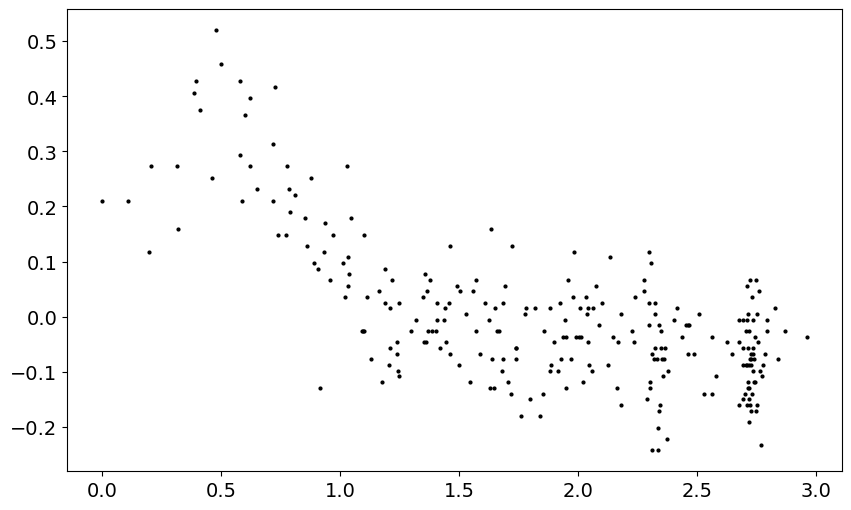

In [446]:
plt.plot(np.abs(wigner_exp_01.data['alpha']), (p_g-p_e), 'o', markersize=2, color='black')

MLE Fidelity:  0.6248615213315211
supertitle is  Text(0.5, 0.98, 'MLE Fidelity: 0.6249')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-06-18_17-01-01_MLE.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-06-18.md


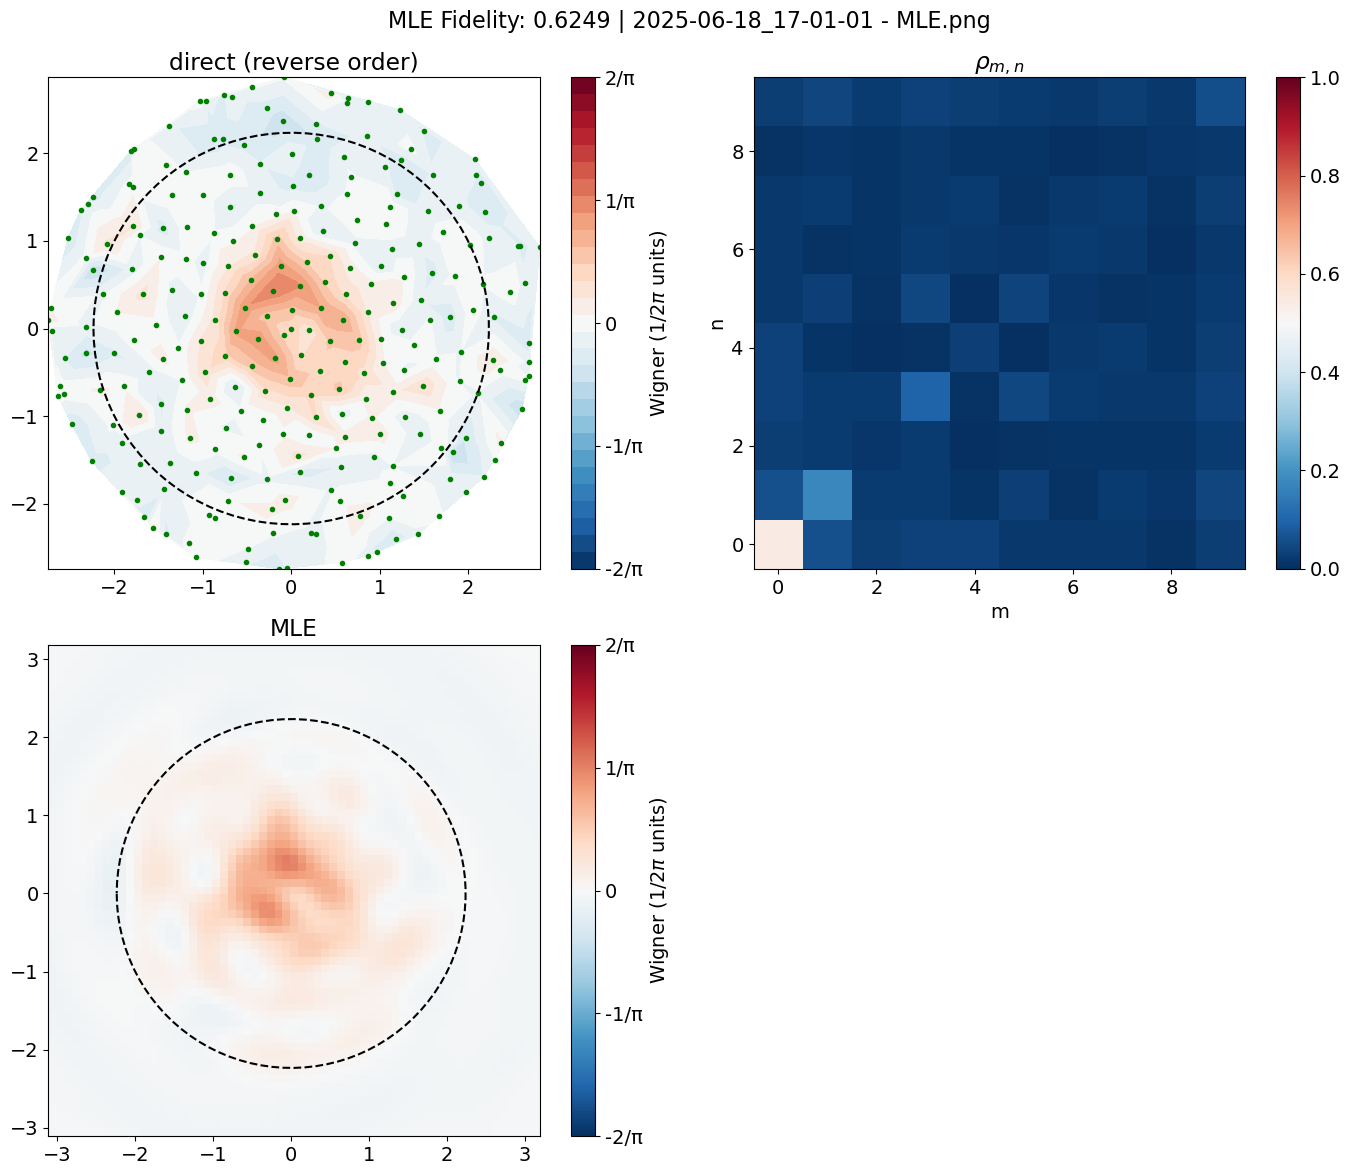

In [447]:
results = wigner_analysis.wigner_analysis_results((p_g -p_e), initial_state=initial_state)
fig = wigner_analysis.plot_wigner_reconstruction_results(results)

In [431]:
wigner_exp_02 = do_wigner_tomography_1mode(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    displace_length=0.05,
    reps = 200,
    displacement_path=return_dict['path'],
    prepulse=True,
    pre_sweep_pulse=pulse_02,
    gate_based = False
)

man mode no: 1


  0%|          | 0/261 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00009_WignerTomography1ModeExperiment.h5


In [432]:
from fitting_folder.wigner import WignerAnalysis
from qutip import fock  
from slab import AttrDict
wigner_analysis = WignerAnalysis(wigner_exp_02.data, config=wigner_exp_02.cfg, mode_state_num=10, alphas = wigner_exp.data['alpha'])
initial_state = (fock(wigner_analysis.m, 2)  + fock(wigner_analysis.m, 0)).unit() # Initial state |0> ?? 1,2, o4 [1,2]
allocated_counts = wigner_analysis.bin_ss_data()
p_e = allocated_counts # Probability of measuring the state |e
p_g = 1 - allocated_counts  # Probability of measuring the state |g

(200, 261)


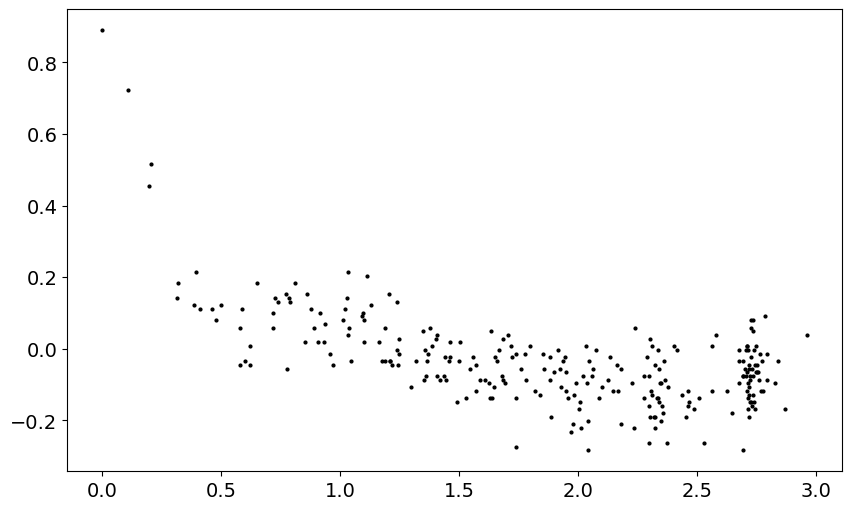

In [433]:
plt.plot(np.abs(wigner_exp_02.data['alpha']), (p_g-p_e), 'o', markersize=2, color='black')

MLE Fidelity:  0.5187873609386402
supertitle is  Text(0.5, 0.98, 'MLE Fidelity: 0.5188')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-06-18_16-51-52_MLE.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-06-18.md


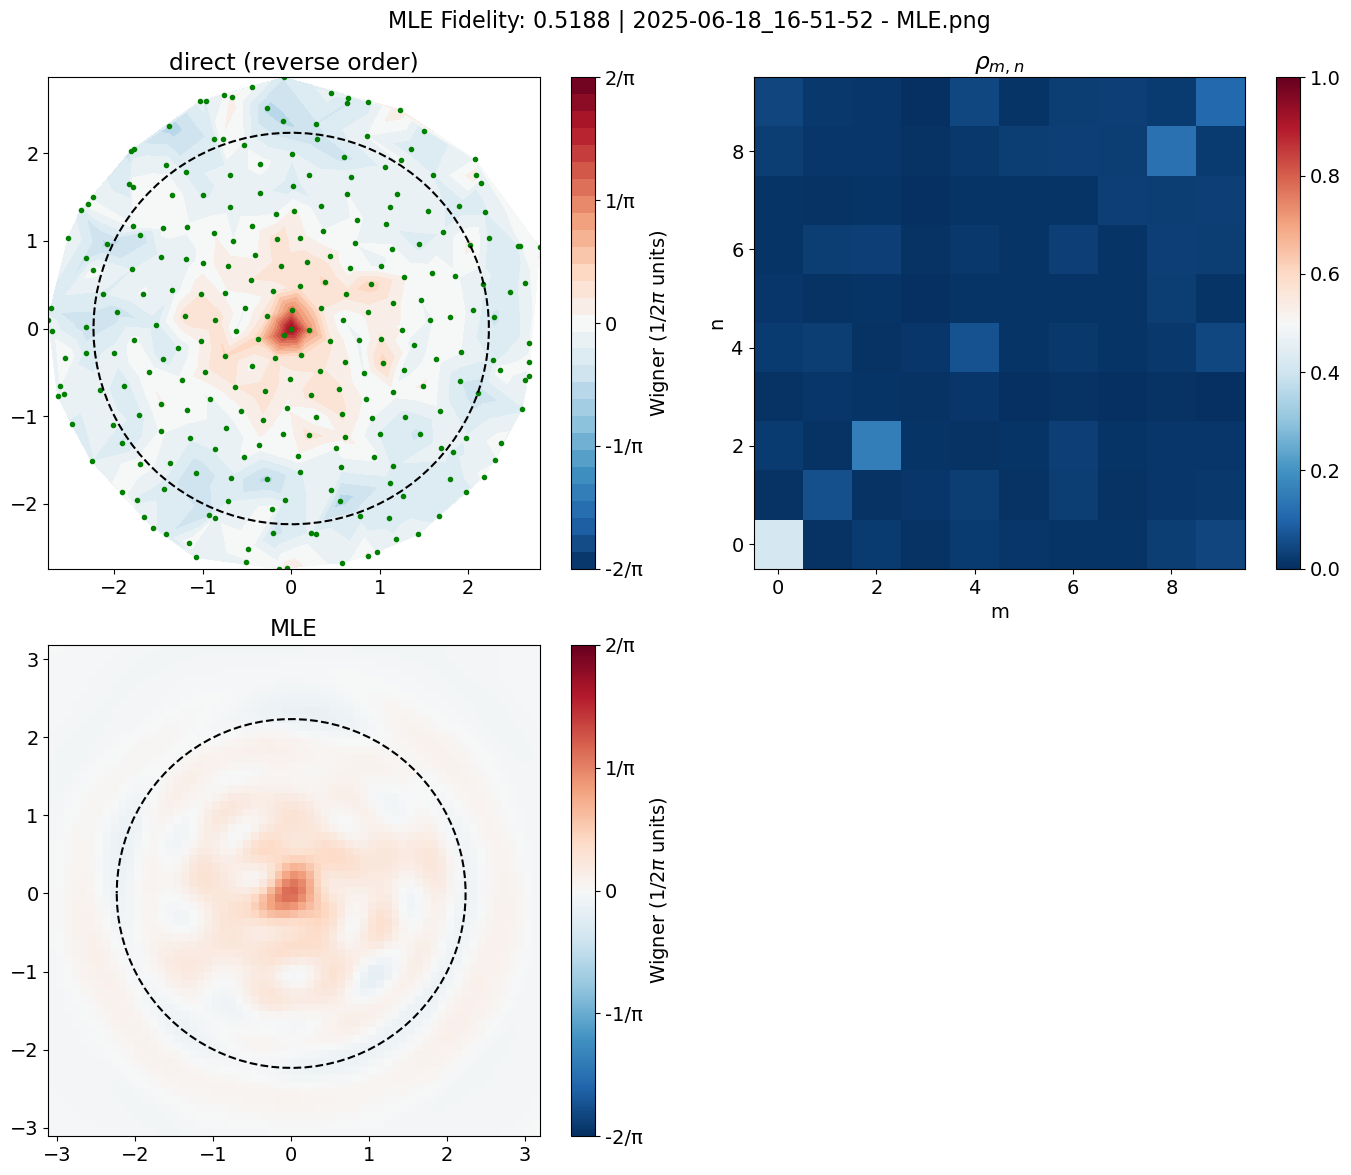

In [434]:
results = wigner_analysis.wigner_analysis_results((p_g -p_e), initial_state=initial_state)
fig = wigner_analysis.plot_wigner_reconstruction_results(results)

In [415]:
expts_base_inst.soc.deg2reg(180, 0)

2147483648

In [413]:
expts_base_inst.soc.deg2reg(180)

2147483648

In [ ]:
from qutip import wigner, fock, displace
import numpy as np
from matplotlib.ticker import MultipleLocator, FuncFormatter

import matplotlib.pyplot as plt




# Define parameters
N = 15  # Hilbert space dimension
n = 2 # Fock state |n>
xvec = np.linspace(-3, 3, 200)
yvec = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(xvec, yvec)
alpha = X + 1j * Y

# Create Fock state
psi = fock(N, n)

# Compute Wigner function
W = wigner(psi, xvec, yvec)

# Plot
fig, ax = plt.subplots(figsize=(6, 5))
c = ax.pcolormesh(X, Y, W, cmap='RdBu_r', shading='auto', vmin=-2/np.pi, vmax=2/np.pi)
ax.set_xlabel('Re(α)')
ax.set_ylabel('Im(α)')
ax.set_title(f'Wigner function for Fock state |{n}>')
cb = fig.colorbar(c, ax=ax)
cb.set_label('Wigner function')
cb.set_ticks([-2/np.pi, 0, 2/np.pi])
plt.show()

# Multiphoton Calibration

## Qubit Calibvration with |1> in man

### g0-e0

In [305]:
def do_amplitude_rabi(
    config_thisrun,
    expt_path,
    config_path,
    start=50,
    step=160,
    expts=151,
    reps=100,
    rounds=1,
    sigma_test=None,
    qubit=0,
    pulse_type='gauss',
    drag_beta=0.0,
    pulse_ge_init=False,
    pulse_ge_after=False,
    checkZZ=False,
    checkEF=False,
    qubits=[0],
    flat_length=0,
    normalize=False,
    single_shot=False,
    singleshot_reps=10000,
    span=50,
    user_defined_freq=[False, 3568.203829046816],
    prepulse=False,
    pre_sweep_pulse=None,
    post_sweep_pulse=None,
    postpulse=False,
    gate_based=False,
    relax_delay=2500,
    if_ef=False
):
    """Run the amplitude Rabi experiment with all config params as function arguments."""
    amprabi = expts_base_inst.meas.single_qubit.amplitude_rabi.AmplitudeRabiExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='AmplitudeRabiExperiment', config_file=config_path
    )

    amprabi.cfg = AttrDict(deepcopy(config_thisrun))
    pulse_ge = config_thisrun.device.qubit.pulses.pi_ge

    if sigma_test is None:
        sigma_test = pulse_ge.sigma[0]

    if if_ef:
        checkEF = True
        pulse_ge_init = True
        pulse_ge_after = True

    amprabi.cfg.expt = dict(
        start=start,
        step=step,
        expts=expts,
        reps=reps,
        rounds=rounds,
        sigma_test=sigma_test,
        qubit=qubit,
        pulse_type=pulse_type,
        drag_beta=drag_beta,
        pulse_ge_init=pulse_ge_init,
        pulse_ge_after=pulse_ge_after,
        checkZZ=checkZZ,
        checkEF=checkEF,
        qubits=qubits,
        flat_length=flat_length,
        normalize=normalize,
        single_shot=single_shot,
        singleshot_reps=singleshot_reps,
        span=span,
        user_defined_freq=user_defined_freq,
        prepulse=prepulse,
        postpulse=postpulse,
        pre_sweep_pulse=pre_sweep_pulse if pre_sweep_pulse is not None else [],
        post_sweep_pulse=post_sweep_pulse if post_sweep_pulse is not None else [],
        gate_based=gate_based
    )
    amprabi.cfg.device.readout.relax_delay = [relax_delay]
    amprabi.go(analyze=False, display=False, progress=True, save=True)
    return amprabi


In [310]:
amprabi = do_amplitude_rabi(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    sigma_test=0.02,
    step = 300,
    expts=101,
    qubit=0,
    user_defined_freq=[False, 3567.063422],
    prepulse=False,
    gate_based=False,
    pre_sweep_pulse=[]
)

  0%|          | 0/10100 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00016_AmplitudeRabiExperiment.h5


Attempted to init fitparam 4 to -208.5192876623377, which is out of bounds -347.806341991342 to -311.84599567099565. Instead init to -329.82616883116884
Attempted to init fitparam 4 to -329.82616883116884, which is out of bounds 319.6206575993079 to 599.4734264721349. Instead init to 459.54704203572135
Pi gain from avgi data [dac units]: 19448
	Pi/2 gain from avgi data [dac units]: 9906
Pi gain from avgq data [dac units]: 96924
	Pi/2 gain from avgq data [dac units]: 62228


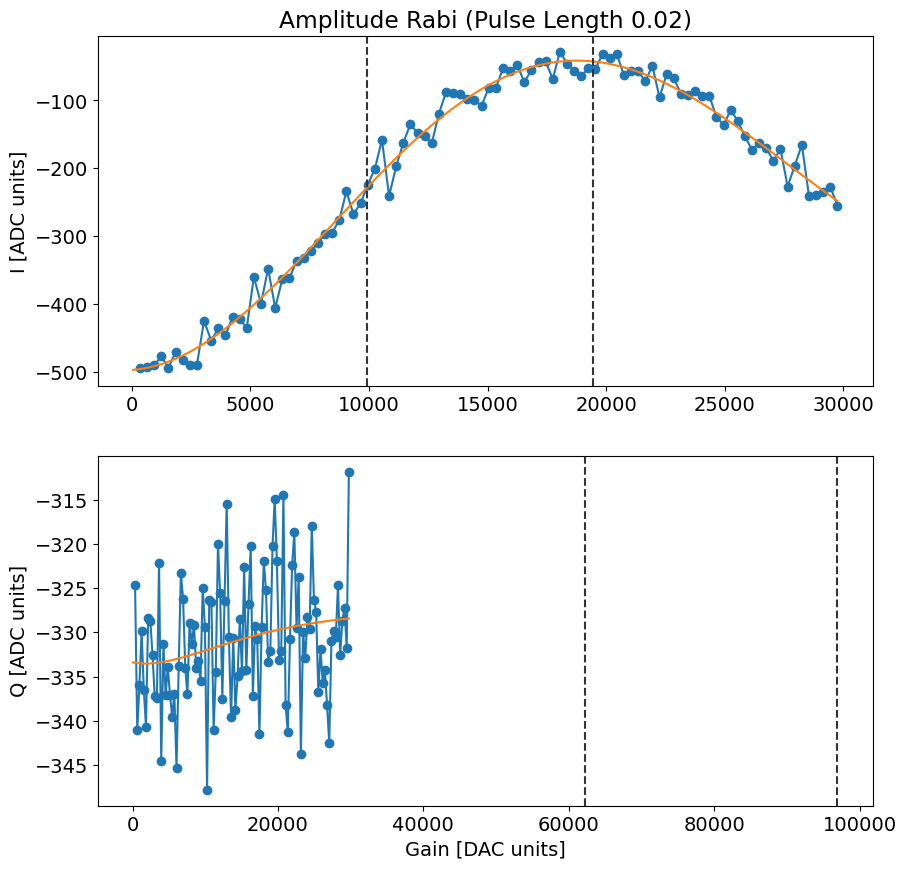

In [311]:
amprabi.analyze(fitparams=[np.max(amprabi.data['amps']), 0.00001, 90, None, None, None])
amprabi.display(title_str='Amplitude Rabi_ge', save_fig=True)

### g1-e1

#### Frequency

In [91]:
def do_t2_ramsey(
    config_thisrun,
    expt_path,
    config_path,
    pre_sweep_pulse=None,
    post_sweep_pulse=None,
    step_size=0.05,
    if_ef=False,
    ef_init=True, # redundant
    start=0.01,
    expts=200,
    ramsey_freq=0.2,
    reps=100,
    rounds=1,
    qubits=[0],
    user_defined_freq=[False, 3568.2038290468167, 5304, 0.035],
    f0g1_cavity=0,
    normalize=False,
    active_reset=False,
    man_reset=True,
    storage_reset=False,
    prepulse=None,
    postpulse=None,
    pre_active_reset_pulse=False,
    gate_based=False,
    advance_phase=0,
    echoes=[False, 0],
    relax_delay=2500
):
    """Run the T2 Ramsey experiment with all config params as function arguments."""
    t2ramsey = expts_base_inst.meas.single_qubit.t2_ramsey.RamseyExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='RamseyExperiment', config_file=config_path
    )

    t2ramsey.cfg = AttrDict(deepcopy(config_thisrun))
    checkEF = False
    qubit_ge_init = False
    qubit_ge_after = False
    if if_ef:
        checkEF = True
        qubit_ge_init = True if ef_init else False
        qubit_ge_after = True if ef_init else False

    t2ramsey.cfg.expt = {
        'start': start,
        'step': step_size,
        'expts': expts,
        'ramsey_freq': ramsey_freq,
        'reps': reps,
        'rounds': rounds,
        'qubits': qubits,
        'checkEF': checkEF,
        'user_defined_freq': user_defined_freq,
        'qubit_ge_init': qubit_ge_init,
        'qubit_ge_after': qubit_ge_after,
        'f0g1_cavity': f0g1_cavity,
        'normalize': normalize,
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'prepulse': False if pre_sweep_pulse is None else True if prepulse is None else prepulse,
        'postpulse': False if post_sweep_pulse is None else True if postpulse is None else postpulse,
        'pre_active_reset_pulse': pre_active_reset_pulse,
        'pre_sweep_pulse': pre_sweep_pulse,
        'post_sweep_pulse': post_sweep_pulse,
        'gate_based': gate_based,
        'advance_phase': advance_phase,
        'echoes': echoes
    }

    t2ramsey.cfg.device.readout.relax_delay = [relax_delay]  # Wait time between experiments [us]
    t2ramsey.go(analyze=False, display=False, progress=True, save=True)
    from multimode_expts.fit_display_classes import RamseyFitting
    t2ramsey_analysis = RamseyFitting(
        t2ramsey.data, config=t2ramsey.cfg,
    )
    return t2ramsey_analysis



# def update_t2_ramsey_ge(t2ramsey, config_thisrun):
#     """Update the configuration based on T2 Ramsey experiment results."""
#     config_thisrun.device.qubit.f_ge = [config_thisrun.device.qubit.f_ge[0] + min(t2ramsey.data['f_adjust_ramsey_avgi'])]
#     print('Updated qubit ge frequency to:', config_thisrun.device.qubit.f_ge[0])


In [37]:
# prepare a photon in man
from MM_dual_rail_base import MM_dual_rail_base
mm_base_dummy = MM_dual_rail_base(expts_base_inst.config_thisrun)
prep_man_pi = mm_base_dummy.prep_man_photon(man_no=1)

In [38]:
prep_man_pi

[['qubit', 'ge', 'pi', 0], ['qubit', 'ef', 'pi', 0], ['man', 'M1', 'pi', 0]]

In [69]:
old_sigma = expts_base_inst.config_thisrun.device.qubit.pulses.pi_ge.sigma[0]
old_gain = expts_base_inst.config_thisrun.device.qubit.pulses.hpi_ge.gain[0]
old_freq = expts_base_inst.config_thisrun.device.qubit.f_ge[0]

In [63]:
old_freq + 0.4703782780138798  -0.2

3567.6184677710157

In [88]:
# Run a Ramsey experiment and analyze the results
t2ramsey_ge_man_1 = do_t2_ramsey(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file, 
    user_defined_freq=[True, 3567.0777112149876,  4648, old_sigma],
    prepulse = True, 
    gate_based = True,
    pre_sweep_pulse = prep_man_pi
    
)

fge is  3567.3480894930017
fef is  3423.9868524018493


  0%|          | 0/20000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00285_RamseyExperiment.h5


In [ ]:
0.4703782780138798 -0

In [72]:
!pip show qick

No echoes in the data
Attempted to init fitparam 1 to 10, which is out of bounds 0.010101010101010102 to 1.5151515151515151. Instead init to 0.7626262626262627
Attempted to init fitparam 4 to -246.68725619439184, which is out of bounds -340.8940692640693 to -273.49502164502167. Instead init to -307.1945454545455
Using user defined frequency: 3567.0777112149876 MHz
Current pi pulse frequency: 3567.0777112149876
Fit frequency from I [MHz]: 0.2220032429159256 +/- 0.0006393561960834597
Suggested new pi pulse frequency from fit I [MHz]:
 	3567.0557079720716
 	3567.4997144579033
T2 Ramsey from fit I [us]: 79.45054758425847
Fit frequency from Q [MHz]: 0.8943476395591837 +/- 0.02849736002051237
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3566.3833635754286
 	3568.172058854547
T2 Ramsey from fit Q [us]: 2.9700000000000006


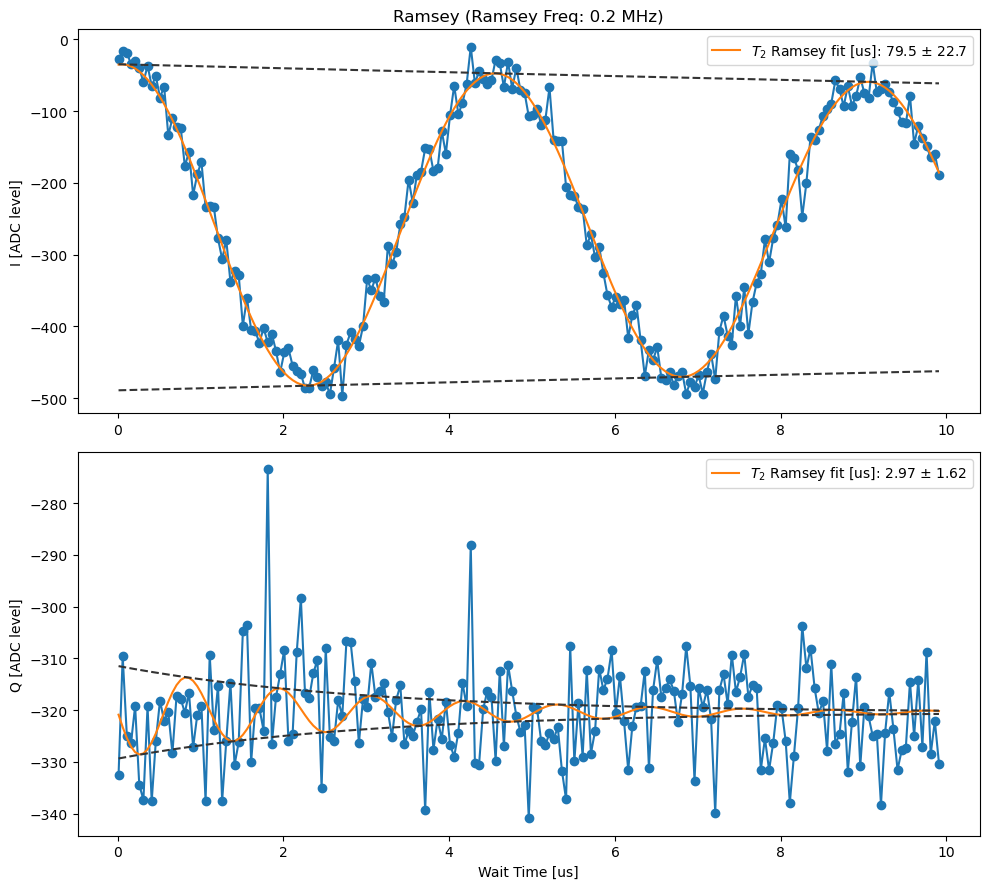

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-06-16_14-41-19_Ramsey.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-06-16.md


In [89]:
t2ramsey_ge_man_1.analyze(fitparams=[500, 10, None, 200, None, None])
t2ramsey_ge_man_1.display()

In [74]:
# H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00281_RamseyExperiment.h5
# from multimode_expts.fit_display_classes import RamseyFitting
# temp_data, attrs, fname = expts_base_inst.prev_data(filename = '00283_RamseyExperiment.h5')
# ramsey_analysis = RamseyFitting(temp_data, config=AttrDict(attrs['config']))
# ramsey_analysis.analyze(fitparams=[500, 10, None, 200, None, None])
# ramsey_analysis.display(title_str='Ramsey Analysis from Previous Data')

In [ ]:
# expts_base_inst.ds_thisrun.append_dataset('qubit_g1_e1', 3567.0557079720716, np.NAN, 10167	4648)

#### Amplitude

In [85]:
def do_amplitude_rabi(
    config_thisrun,
    expt_path,
    config_path,
    start=50,
    step=160,
    expts=151,
    reps=100,
    rounds=1,
    sigma_test=None,
    qubit=0,
    pulse_type='gauss',
    drag_beta=0.0,
    pulse_ge_init=False,
    pulse_ge_after=False,
    checkZZ=False,
    checkEF=False,
    qubits=[0],
    flat_length=0,
    normalize=False,
    single_shot=False,
    singleshot_reps=10000,
    span=50,
    user_defined_freq=[False, 3568.203829046816],
    prepulse=False,
    pre_sweep_pulse=None,
    post_sweep_pulse=None,
    postpulse=False,
    gate_based=False,
    relax_delay=2500,
    if_ef=False
):
    """Run the amplitude Rabi experiment with all config params as function arguments."""
    amprabi = expts_base_inst.meas.single_qubit.amplitude_rabi.AmplitudeRabiExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='AmplitudeRabiExperiment', config_file=config_path
    )

    amprabi.cfg = AttrDict(deepcopy(config_thisrun))
    pulse_ge = config_thisrun.device.qubit.pulses.pi_ge

    if sigma_test is None:
        sigma_test = pulse_ge.sigma[0]

    if if_ef:
        checkEF = True
        pulse_ge_init = True
        pulse_ge_after = True

    amprabi.cfg.expt = dict(
        start=start,
        step=step,
        expts=expts,
        reps=reps,
        rounds=rounds,
        sigma_test=sigma_test,
        qubit=qubit,
        pulse_type=pulse_type,
        drag_beta=drag_beta,
        pulse_ge_init=pulse_ge_init,
        pulse_ge_after=pulse_ge_after,
        checkZZ=checkZZ,
        checkEF=checkEF,
        qubits=qubits,
        flat_length=flat_length,
        normalize=normalize,
        single_shot=single_shot,
        singleshot_reps=singleshot_reps,
        span=span,
        user_defined_freq=user_defined_freq,
        prepulse=prepulse,
        postpulse=postpulse,
        pre_sweep_pulse=pre_sweep_pulse if pre_sweep_pulse is not None else [],
        post_sweep_pulse=post_sweep_pulse if post_sweep_pulse is not None else [],
        gate_based=gate_based
    )
    amprabi.cfg.device.readout.relax_delay = [relax_delay]
    amprabi.go(analyze=False, display=False, progress=True, save=True)
    return amprabi


In [97]:
amprabi = do_amplitude_rabi(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    sigma_test=old_sigma,
    qubit=0,
    user_defined_freq=[False, 3567.063422],
    prepulse=False,
    gate_based=True,
    pre_sweep_pulse=prep_man_pi
)

  0%|          | 0/15100 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00012_AmplitudeRabiExperiment.h5


Attempted to init fitparam 4 to -304.74770505050503, which is out of bounds 318.44327491312004 to 604.8351025243501. Instead init to 461.63918871873506
Pi gain from avgi data [dac units]: 10387
	Pi/2 gain from avgi data [dac units]: 4728
Pi gain from avgq data [dac units]: 49003
	Pi/2 gain from avgq data [dac units]: 32262


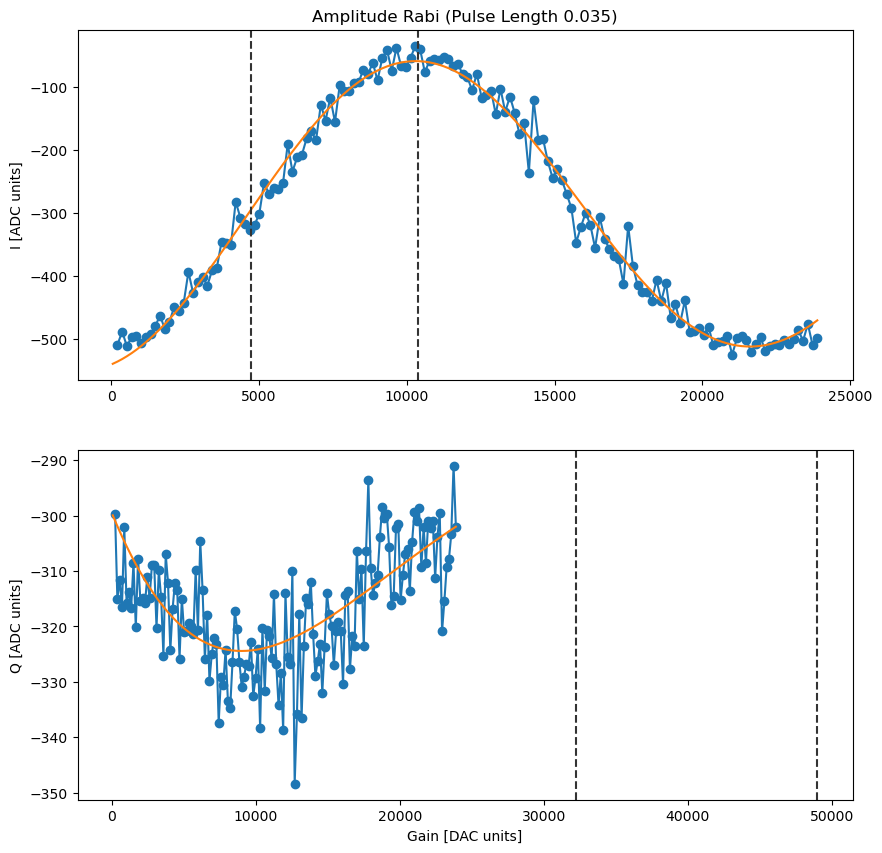

In [98]:
amprabi.analyze(fitparams=[np.max(amprabi.data['amps']), 0.00001, 90, None, None, None])
amprabi.display(title_str='Amplitude Rabi_ge', save_fig=True)

### e1-f1

#### Frequency

In [ ]:
old_sigma = expts_base_inst.config_thisrun.device.qubit.pulses.pi_ge.sigma[0]
old_gain = expts_base_inst.config_thisrun.device.qubit.pulses.hpi_ge.gain[0]
old_freq = expts_base_inst.config_thisrun.device.qubit.f_ge[0]

In [ ]:
# adding g1-e1 to the prepulse 
from MM_dual_rail_base import MM_dual_rail_base
mm_base_dummy = MM_dual_rail_base(expts_base_inst.config_thisrun)
prep_man_pi = mm_base_dummy.prep_man_photon(man_no=1)
# Add another ge pulse and change its parameters 
prep_man_pi.append(['qubit', 'ge', 'pi', 0])
## convert it to low level pulse 
pulse = mm_base_dummy.get_prepulse_creator(prep_man_pi).pulse.tolist()

# change to g1 - e1
pulse[0][-1] = 3567.05570797207  # g1 - e1 freq
pulse[1][-1] = 10167 # gain 

post_pulse = [[pulse[i][-1]] for i in range(len(pulse))]  # post pulse is the same as prepulse
post_pulse

In [110]:
post_pulse = [[pulse[i][-1]] for i in range(len(pulse))]  # post pulse is the same as prepulse
post_pulse

[[3567.05570797207], [10167], [0.0], [0], [2], ['g'], [0.035]]

In [113]:
# Run a Ramsey experiment and analyze the results
t2ramsey_e1f1 = do_t2_ramsey(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file, 
    user_defined_freq=[True, 3423.742663513891, 3858, old_sigma],
    prepulse = True, 
    postpulse = True,
    gate_based = False,
    pre_sweep_pulse = pulse,
    post_sweep_pulse=post_pulse
)

fge is  3567.3480894930017
fef is  3423.9868524018493


  0%|          | 0/20000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00288_RamseyExperiment.h5


No echoes in the data
Using user defined frequency: 3423.742663513891 MHz
Current pi pulse frequency: 3423.742663513891
Fit frequency from I [MHz]: 0.21819615805732137 +/- 0.0006288197140199255
Suggested new pi pulse frequency from fit I [MHz]:
 	3423.7244673558334
 	3424.1608596719484
T2 Ramsey from fit I [us]: 50.45873913865472
Fit frequency from Q [MHz]: 0.010101010134556688 +/- 0.46366279903891305
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3423.9325625037563
 	3423.9527645240255
T2 Ramsey from fit Q [us]: 2.9700000000000006


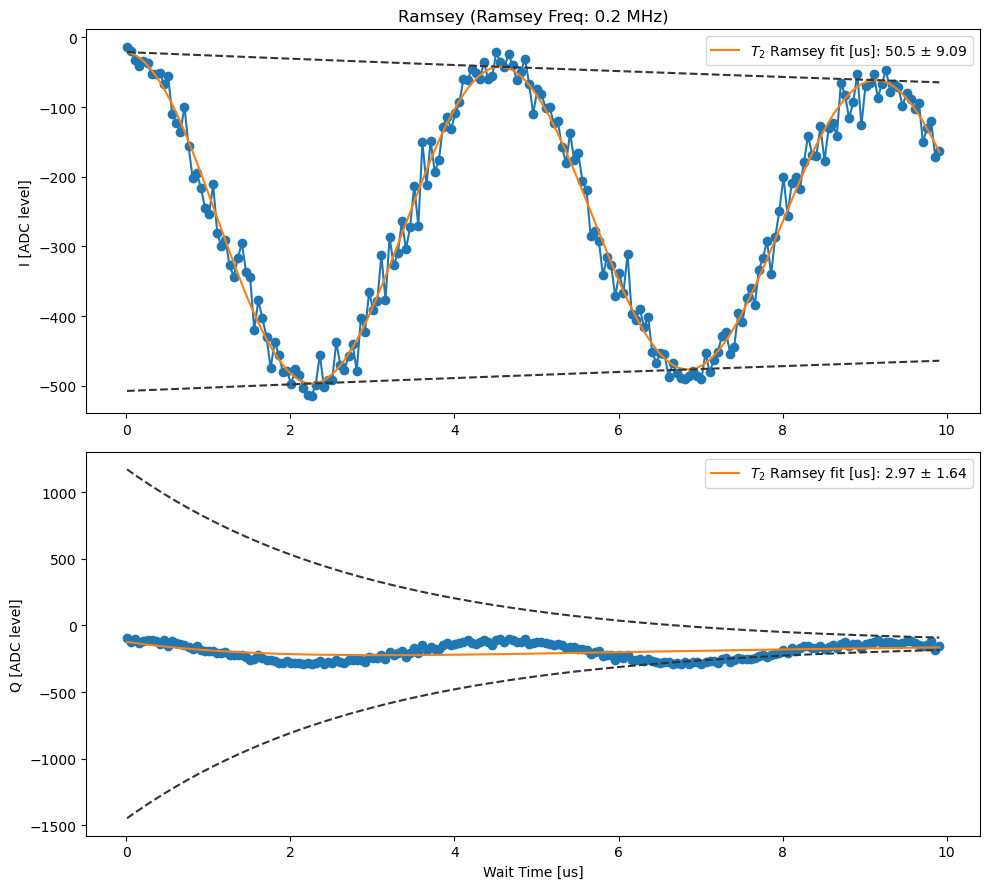

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-06-16_15-11-03_Ramsey.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-06-16.md


In [115]:
t2ramsey_e1f1.analyze(fitparams=[500, 0.1, None, 200, None, None])
t2ramsey_e1f1.display()

#### Amplitude

In [116]:
amprabi_e1f1 = do_amplitude_rabi(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    sigma_test=old_sigma,
    qubit=0,
    user_defined_freq=[True, 3423.7244673558334],
    prepulse=True,
    postpulse=True,
    gate_based=False,
    pre_sweep_pulse=pulse,
    post_sweep_pulse=post_pulse
)


  0%|          | 0/15100 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00013_AmplitudeRabiExperiment.h5


Attempted to init fitparam 4 to -283.76188008658005, which is out of bounds 97.54788363175764 to 600.1378881791388. Instead init to 348.8428859054482
Pi gain from avgi data [dac units]: 8276
	Pi/2 gain from avgi data [dac units]: 3859
Pi gain from avgq data [dac units]: 130749
	Pi/2 gain from avgq data [dac units]: 71149


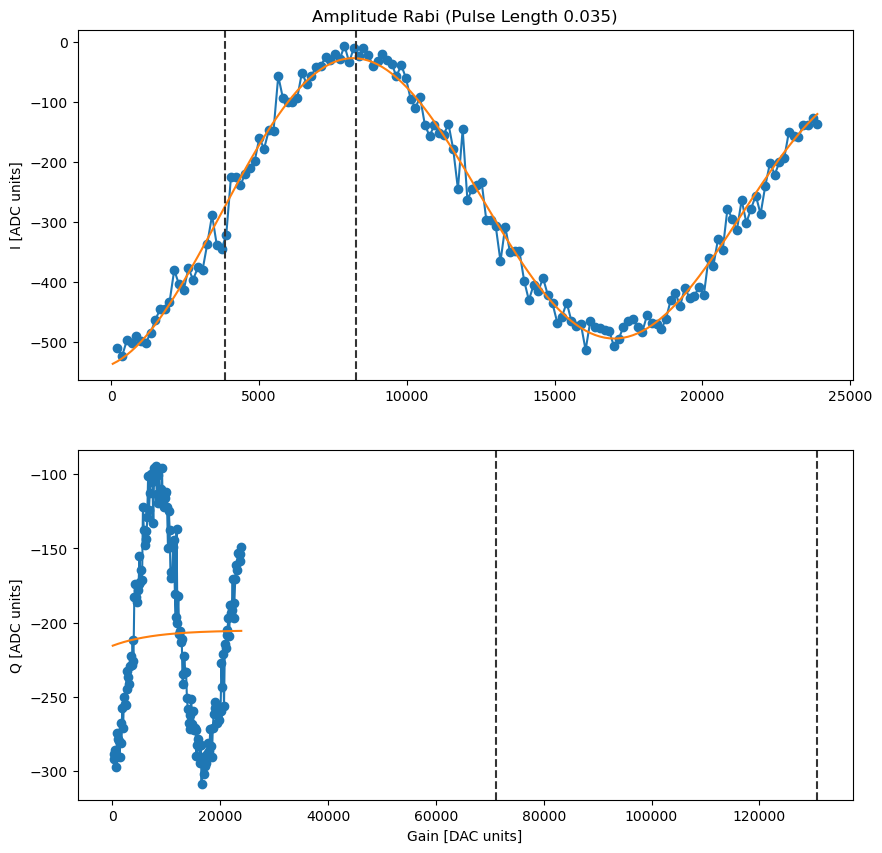

In [118]:
amprabi_e1f1.analyze(fitparams=[np.max(amprabi.data['amps']), 0.00001, 90, None, None, None])
amprabi_e1f1.display(title_str='Amplitude Rabi_ge', save_fig=True)

In [6]:
expts_base_inst.load_storage_man_swap_dataset()

(<multimode_expts.dataset.storage_man_swap_dataset at 0x1c239c30b80>,
 'C:\\_Lib\\python\\multimode_expts\\man1_storage_swap_dataset_copy.csv')

### f1-g2

#### Find Frequency pulse probe

In [130]:
def do_pulse_probe_f0g1(
    config_thisrun,
    ds_thisrun,
    man_mode_no=1,
    start=2003,
    step=0.01,
    expts=500,
    reps=100,
    rounds=1,
    length=1,
    gain=5000,
    pulse_type='gaussian',
    qubit_f=False,
    qubits=[0],
    prepulse=False,
    pre_sweep_pulse=None,
    relax_delay=200
):
    """
    Run the Pulse Probe F0g1 Spectroscopy experiment with configurable parameters.
    """
    qspec = expts_base_inst.meas.single_qubit.pulse_probe_f0g1_spectroscopy.PulseProbeF0g1SpectroscopyExperiment(
        soccfg=expts_base_inst.soc, path=expts_base_inst.expt_path, prefix='PulseProbeF0g1SpectroscopyExperiment', config_file=expts_base_inst.config_file
    )

    qspec.cfg = AttrDict(deepcopy(config_thisrun))

    if start is None:
        start = ds_thisrun.get_freq('M' + str(man_mode_no)) - 5
    if pre_sweep_pulse is None:
        pre_sweep_pulse = [[3569.4827896982997], [11161], [0], [0], [2], ['g'], [0.035]]

    qspec.cfg.expt = {
        'start': start,
        'step': step,
        'expts': expts,
        'reps': reps,
        'rounds': rounds,
        'length': length,
        'gain': gain,
        'pulse_type': pulse_type,
        'qubit_f': qubit_f,
        'qubits': qubits,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse
    }

    qspec.cfg.device.readout.relax_delay = [relax_delay]
    qspec.go(analyze=False, display=False, progress=True, save=True)
    return qspec

def analyze_and_display_pulse_probe_f0g1(qspec):
    from multimode_expts.fit_display_classes import Spectroscopy
    spec_analysis = Spectroscopy(
        qspec.data)
    spec_analysis.analyze(fit=True)
    spec_analysis.display()



In [131]:
# adding g1-e1 and e1-f1 to the prepulse 
from MM_dual_rail_base import MM_dual_rail_base
mm_base_dummy = MM_dual_rail_base(expts_base_inst.config_thisrun)
prep_man_pi = mm_base_dummy.prep_man_photon(man_no=1)
# Add another ge pulse and change its parameters 
prep_man_pi.append(['qubit', 'ge', 'pi', 0])
prep_man_pi.append(['qubit', 'ef', 'pi', 0])
## convert it to low level pulse 
pulse = mm_base_dummy.get_prepulse_creator(prep_man_pi).pulse.tolist()

# change to g1 - e1
pulse[0][-2] = 3567.05570797207  # g1 - e1 freq
pulse[1][-2] = 10167 # gain 

pulse[0][-1] = 3423.724467  # e1 - f1 freq
pulse[1][-1] = 8276 # gain 

post_pulse = [[pulse[i][-1]] for i in range(len(pulse))]  # post pulse is the same as prepulse
post_pulse

[[3423.724467], [8276], [0.0], [0], [2], ['gauss'], [0.035]]

In [132]:
pulse

[[3567.3480894930017,
  3423.9868524018493,
  2005.9,
  3567.05570797207,
  3423.724467],
 [10409, 8221, 15000, 10167, 8276],
 [0.0, 0.0, 1.082052141523385, 0.0, 0.0],
 [0, 0, 0, 0, 0],
 [2, 2, 0, 2, 2],
 ['gauss', 'gauss', 'flat_top', 'gauss', 'gauss'],
 [0.035, 0.035, 0.005, 0.035, 0.035]]

  0%|          | 0/50000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00051_PulseProbeF0g1SpectroscopyExperiment.h5
Found peak in amps at [MHz] 2005.8505231650765, HWHM 0.46381646451686664
Found peak in I at [MHz] 2005.8476572248726, HWHM 0.46425041270286843
Found peak in Q at [MHz] 2005.8564292921956, HWHM 0.47451573226222515


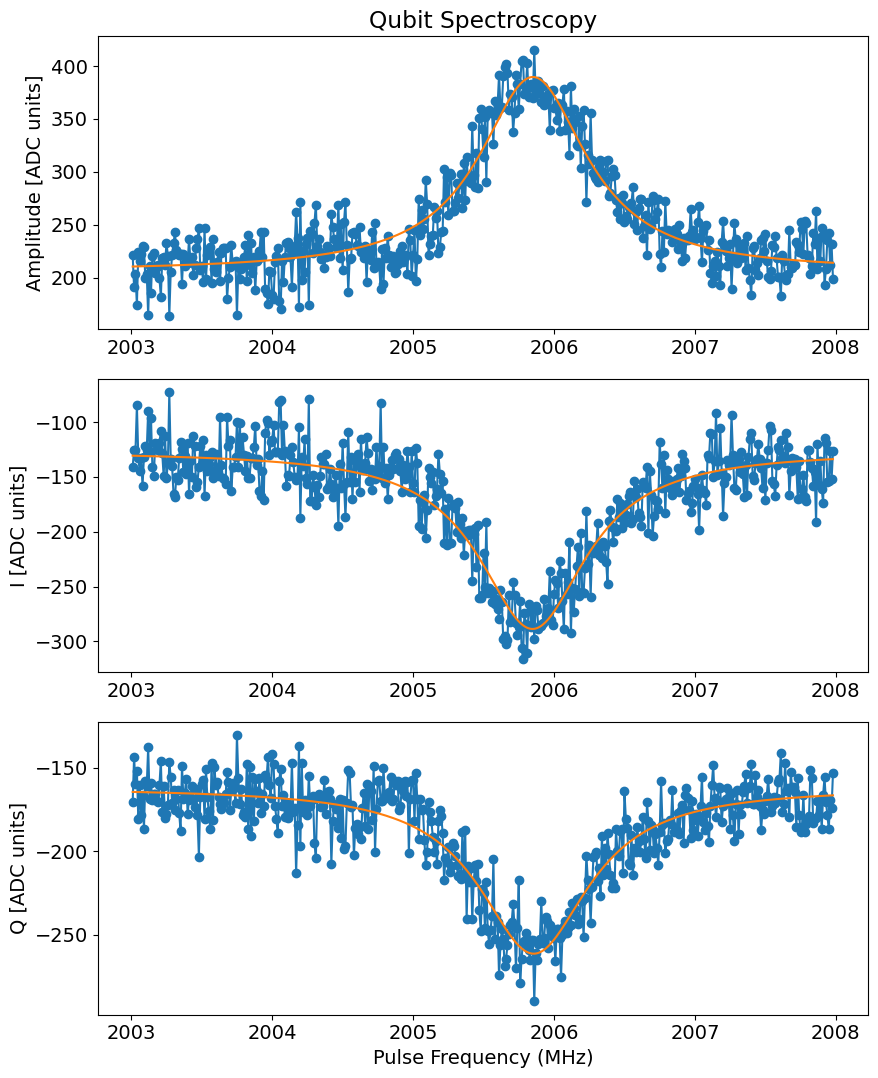

In [133]:
man_spec = do_pulse_probe_f0g1(expts_base_inst.config_thisrun,
                                expts_base_inst.ds_thisrun, 
                                man_mode_no = 1, 
                                prepulse = False, pre_sweep_pulse=pulse,)
analyze_and_display_pulse_probe_f0g1(man_spec)
        

#### Find Frequency (Chevron)


In [ ]:
%matplotlib inline

In [134]:
def do_length_rabi_f1g2_sweep(
    config_thisrun,
    expt_path,
    config_path,
    freq_start,
    freq_stop,
    freq_step,
    start=2,
    step=0.05,
    qubits=[0],
    expts=101,
    reps=100,
    rounds=1,
    gain=15000,
    ramp_sigma=0.005,
    use_arb_waveform=False,
    pi_ge_before=False,
    pi_ef_before=False,
    pi_ge_after=False,
    normalize=False,
    active_reset=False,
    check_man_reset=[False, 0],
    check_man_reset_pi=[],
    prepulse=False,
    postpulse=False,
    pre_sweep_pulse=None,
    post_sweep_pulse=None,
    err_amp_reps=0
):
    """Run the Length Rabi General F0g1 Experiment Sweep with configurable parameters."""
    from multimode_expts.sequential_experiment_classes import man_f0g1_class
    experiment_class = man_f0g1_class
    sweep_experiment_name = 'length_rabi_f0g1_sweep'
    class_for_exp = experiment_class(
        soccfg=expts_base_inst.soc,
        path=expt_path,
        prefix=sweep_experiment_name,
        config_file=config_path,
        exp_param_file=expts_base_inst.exp_param_file,
        config_thisrun=config_thisrun
    )

    class_for_exp.loaded[sweep_experiment_name] = {
        'freq_start': freq_start,
        'freq_stop': freq_stop,
        'freq_step': freq_step,
        'start': start,
        'step': step,
        'qubits': qubits,
        'expts': expts,
        'reps': reps,
        'rounds': rounds,
        'gain': gain,
        'ramp_sigma': ramp_sigma,
        'use_arb_waveform': use_arb_waveform,
        'pi_ge_before': pi_ge_before,
        'pi_ef_before': pi_ef_before,
        'pi_ge_after': pi_ge_after,
        'normalize': normalize,
        'active_reset': active_reset,
        'check_man_reset': check_man_reset,
        'check_man_reset_pi': check_man_reset_pi,
        'prepulse': prepulse,
        'postpulse': postpulse,
        'post_sweep_pulse': post_sweep_pulse,
        'pre_sweep_pulse': pre_sweep_pulse,
        'err_amp_reps': err_amp_reps,
    }
    return eval('class_for_exp.run_sweep')(sweep_experiment_name=sweep_experiment_name)




In [135]:
# adding g1-e1 and e1-f1 to the prepulse 
from MM_dual_rail_base import MM_dual_rail_base
mm_base_dummy = MM_dual_rail_base(expts_base_inst.config_thisrun)
prep_man_pi = mm_base_dummy.prep_man_photon(man_no=1)
# Add another ge pulse and change its parameters 
prep_man_pi.append(['qubit', 'ge', 'pi', 0])
prep_man_pi.append(['qubit', 'ef', 'pi', 0])
## convert it to low level pulse 
pulse = mm_base_dummy.get_prepulse_creator(prep_man_pi).pulse.tolist()

# change to g1 - e1
pulse[0][-2] = 3567.05570797207  # g1 - e1 freq
pulse[1][-2] = 10167 # gain 

pulse[0][-1] = 3423.724467  # e1 - f1 freq
pulse[1][-1] = 8276 # gain 

post_pulse = [[pulse[i][-1]] for i in range(len(pulse))]  # post pulse is the same as prepulse
post_pulse

[[3423.724467], [8276], [0.0], [0], [2], ['gauss'], [0.035]]

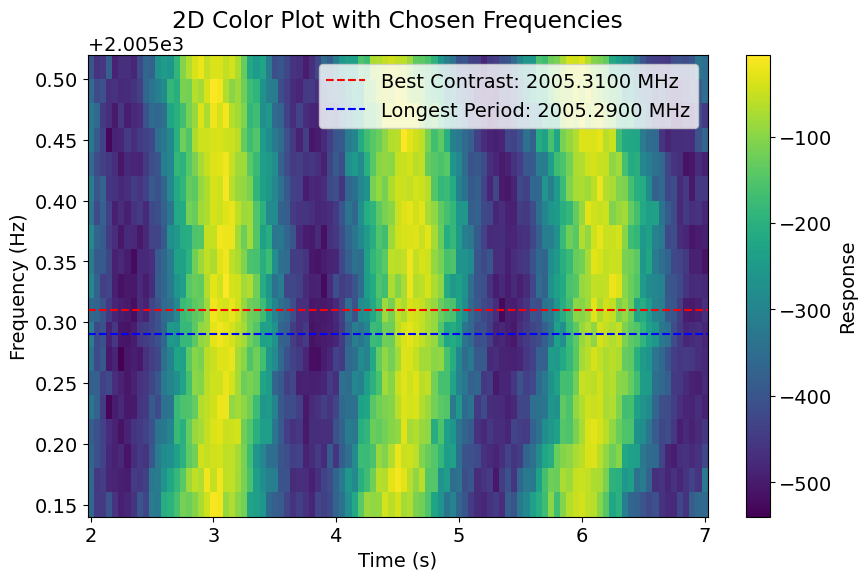

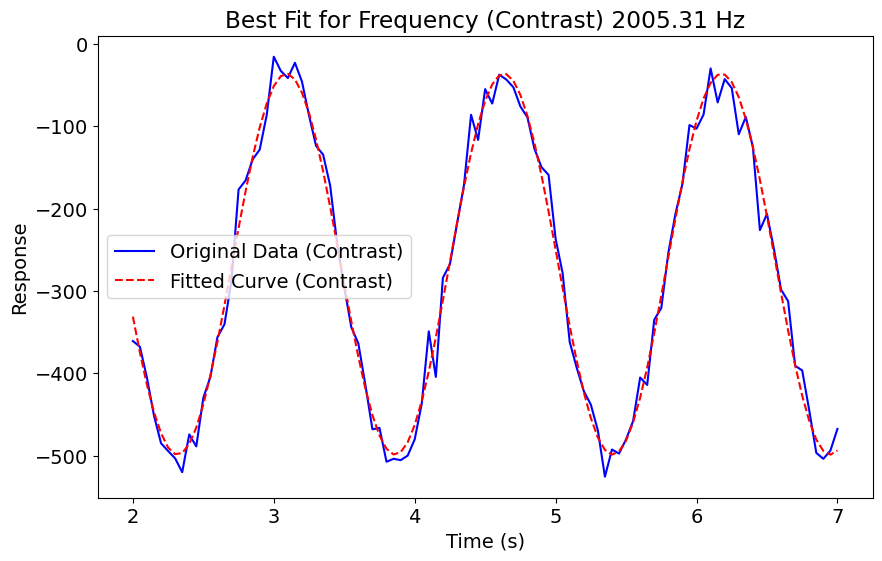

Index: 19 Freq. = 2005.5299999999995 GHz
Running experiment with config: configthisrun
{'start': 2, 'step': 0.05, 'qubits': [0], 'expts': 101, 'reps': 100, 'rounds': 1, 'gain': 15000, 'freq': 2005.5299999999995, 'use_arb_waveform': False, 'pi_ge_before': False, 'pi_ef_before': False, 'pi_ge_after': False, 'pi_ef_after': False, 'normalize': False, 'active_reset': False, 'check_man_reset': [False, 0], 'swap_lossy': False, 'check_man_reset_pi': [], 'prepulse': True, 'pre_sweep_pulse': [[3567.3480894930017, 3423.9868524018493, 2005.9, 3567.05570797207, 3423.724467], [10409, 8221, 15000, 10167, 8276], [0.0, 0.0, 1.082052141523385, 0.0, 0.0], [0, 0, 0, 0, 0], [2, 2, 0, 2, 2], ['gauss', 'gauss', 'flat_top', 'gauss', 'gauss'], [0.035, 0.035, 0.005, 0.035, 0.035]], 'err_amp_reps': 0}


KeyboardInterrupt: 

In [138]:
i = 0 
ds_thisrun = expts_base_inst.ds_thisrun
guess_freq = 2005.35
freq_start = guess_freq- 0.2
freq_stop = guess_freq + 0.2
freq_step = 0.02
man_chevrons_coarse = do_length_rabi_f1g2_sweep(expts_base_inst.config_thisrun, expts_base_inst.expt_path, expts_base_inst.config_file, 
                                                freq_start, freq_stop, freq_step,
                                                prepulse = True, 
                                                pre_sweep_pulse=pulse,
                                                postpulse = True ,
                                                post_sweep_pulse=post_pulse,
                                                )

In [267]:
(2.2-3.8)/2

-0.7999999999999998

#### Length

In [268]:
def do_length_rabi_f0g1_general(
    config_thisrun,
    ds_thisrun,
    expt_path,
    config_path,
    man_mode_no=1,
    start=None,
    step=0.05,
    qubits=[0],
    expts=150,
    reps=100,
    rounds=1,
    gain=15000,
    freq=None,
    use_arb_waveform=False,
    pi_ge_before=False,
    pi_ef_before=False,
    pi_ge_after=False,
    normalize=False,
    active_reset=False,
    man_reset=True,
    stor_reset=True,
    check_man_reset=[False, 0],
    swap_lossy=False,
    check_man_reset_pi=[],
    prepulse=True,
    postpulse=False,
    post_sweep_pulse=None,
    pre_sweep_pulse=None,
    err_amp_reps=0,
    relax_delay=2500
):
    """
    Run the Length Rabi General F0g1 Experiment with all config params as function arguments.
    """
    length_rabi = expts_base_inst.meas.single_qubit.length_rabi_f0g1_general.LengthRabiGeneralF0g1Experiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='LengthRabiGeneralF0g1Experiment', config_file=config_path
    )

    length_rabi.cfg = AttrDict(deepcopy(config_thisrun))

    if freq is None:
        freq = ds_thisrun.get_freq('M' + str(man_mode_no))
    if start is None:
        start = expts_base_inst.soc.cycles2us(3)
    if pre_sweep_pulse is None:
        pre_sweep_pulse = []

    length_rabi.cfg.expt = dict(
        start=start,
        step=step,
        qubits=qubits,
        expts=expts,
        reps=reps,
        rounds=rounds,
        gain=gain,
        freq=freq,
        use_arb_waveform=use_arb_waveform,
        pi_ge_before=pi_ge_before,
        pi_ef_before=pi_ef_before,
        pi_ge_after=pi_ge_after,
        normalize=normalize,
        active_reset=active_reset,
        man_reset=man_reset,
        stor_reset=stor_reset,
        check_man_reset=check_man_reset,
        swap_lossy=swap_lossy,
        check_man_reset_pi=check_man_reset_pi,
        prepulse=prepulse,
        pre_sweep_pulse=pre_sweep_pulse,
        postpulse=postpulse,
        post_sweep_pulse=post_sweep_pulse,
        err_amp_reps=err_amp_reps,
    )

    length_rabi.cfg.device.readout.relax_delay = [relax_delay]
    length_rabi.go(analyze=False, display=False, progress=True, save=True)

    from multimode_expts.fit_display_classes import LengthRabiFitting
    length_rabi_analysis = LengthRabiFitting(length_rabi.data, config=length_rabi.cfg)
    length_rabi_analysis.analyze()
    length_rabi_analysis.display(title_str='Length Rabi General F0g1')

    return length_rabi_analysis





In [274]:
from MM_dual_rail_base import MM_dual_rail_base
mm_base_dummy = MM_dual_rail_base(expts_base_inst.config_thisrun )
prep_man_pi = mm_base_dummy.prep_man_photon(man_no=1)
# Add another ge pulse and change its parameters 
prep_man_pi.append(['multiphoton', 'g1-e1', 'pi', 0])
prep_man_pi.append(['multiphoton', 'e1-f1', 'pi', 0])  
# prep_man_pi.append(['multiphoton', 'f1-g2', 'pi', 0])  

pre_sweep_pulse = mm_base_dummy.get_prepulse_creator(prep_man_pi).pulse.tolist()

check_man_pi_pulse = [['multiphoton', 'e1-f1', 'pi', 0],]
post_sweep_pulse = mm_base_dummy.get_prepulse_creator(check_man_pi_pulse).pulse.tolist()


In [276]:
pre_sweep_pulse

[[3567.346827832447, 3423.9868279076563, 2005.9, 3567.055708, 3423.724467],
 [10409, 8221, 15000, 10167, 8276],
 [0.0, 0.0, 1.082052141523385, 0, 0],
 [0, 0, 0, 0, 0],
 [2, 2, 0, 2, 2],
 ['g', 'g', 'flat_top', 'gauss', 'gauss'],
 [0.035, 0.035, 0.005, 0.035, 0.035]]

  0%|          | 0/150 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00087_LengthRabiGeneralF0g1Experiment.h5
p1: 0.6502612778157953
p2: 87.7615410988669
Pi length: 0.7784839089487299
Pi/2 length: 0.3940230644713512
p1: 0.6455755562193455
p2: 102.57936602903781
Pi length: 0.7203762783546204
Pi/2 length: 0.3331249371420386


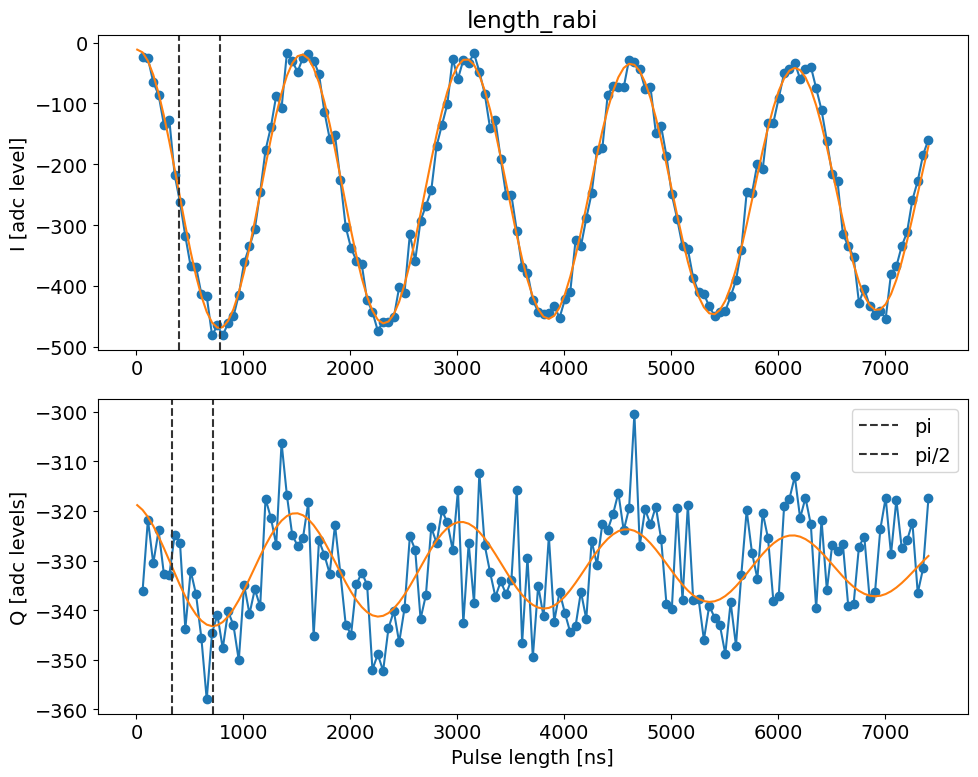

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-06-18_11-17-42_Length_Rabi_General_F0g1.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-06-18.md


In [275]:

len_rabis_mans = do_length_rabi_f0g1_general(expts_base_inst.config_thisrun, expts_base_inst.ds_thisrun,
                                              expts_base_inst.expt_path, expts_base_inst.config_file, man_mode_no= 1,
                                              freq = 2005.32,
                                              prepulse=True,
                                                pre_sweep_pulse=pre_sweep_pulse, postpulse=True, post_sweep_pulse=post_sweep_pulse
                                              )
        

# Save Config

In [373]:
expts_base_inst.recursive_compare(expts_base_inst.yaml_cfg, expts_base_inst.config_thisrun)

Key 'device.manipulate.gain_to_alpha' differs:
  Old value (config1): [0.00014281, 0.00020045]
  New value (config2): [0.000201904580286975, 0.00020045]


In [374]:
expts_base_inst.handle_config_update(updateConfig_bool=True)

Comparing configurations:
Key 'device.manipulate.gain_to_alpha' differs:
  Old value (config1): [0.00014281, 0.00020045]
  New value (config2): [0.000201904580286975, 0.00020045]
Directory created for autocalibration plots at: H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\autocalibration_plots_2025-06-18
Configuration updated and saved, excluding storage_man_file. 
!!!!Please set updateConfig to False after this run!!!!!!.
